# Replication of Gonzalez, Robert M. (2021): Cell Phone Access and Election Fraud: Evidence from a Spatial Regression Discontinuity Design in Afghanistan.

Project by Islom Juraev, Summer 2021

# Main motivation

Emerging countries confront with electoral fraud. For instance, Electoral Complaints Commission (ECC) did audit the results of 2009 Afhgan Presidential election. After auditing the votes, ECC ordered a runoff election because there was electoral fraud in the form of suspected votes. After eliminating suspected votes, incumbent Hamid Karzai's vote share dropped by nearly 5 percent (from 54.6 to 49.67), while the vote share of his main oppenent rose by nearly 3 percent (from 27.8 to 30.59). 

Recent Belorusian Presidential election results are called to be invalidated by Central Election Commission after the requirement of all Belorusian oppositon candidates. The election was claimed the widespread of electoral fraud. Some countries
didn't accept the results of the election. Due to the electoral fraud in 2020 Belorusian Presidential election, European Union imposed sanctions on Belarusian officials deemed to be responsible for "violence, repression and election fraud" (Source: Sky news). The results of the election led to widespread protests in Belarus.

Taking into account above given recent electoral farud cases in Presidential elections, it is required to thoroughly investigate the corruption behavior of eletion fraud. One of the most widespread way of combating against corrupt behavior is to accept law or some instrument that serves to reduce the size of corrupt behavior in all spheres of society. However, in analysis of causal effects of introducing the policy instrument that to combat corruption there might appear the potential problems with detering the effects of those instruments on reducing the corrupt behavior due to the simultaneity assumption. In terms of deterring the corrupt behavior, Gonzalez (2021) did research on the impact of cell phone access on election fraud and he found significant (in terms of statistics and economics) results on that topic. According to the thoery, development in information technologies can be effective in combating corruption by improving transparency and increasing the active participation of society in election process.


In [21]:
library(foreign)
library(haven)
library(ggplot2)
library(devtools)
library(dplyr)
library(cluster)
library(RStata)
library(plm)
library(lmtest)
library(sandwich)
library(stargazer)
library(rdrobust)
library(lsmeans)
library(gt)
library(webshot)
library(IRdisplay)
library(AICcmodavg)
source("auxiliary/Initial_data.R")

# Roadmap of project
I replicate the main results of Section II and omit Section III. Section III of this paper explores the coverage-fraud channel and this analysis is out of the scope of my project. Section II has 7 tables and 6 figures except appendix materials. I replicate the results of Figure 1, Table 1 and 2 of Section II by extending, adjusting or splitting them into another tables. In terms of extention, I run the main equation $(1)$ by omitting the boundary segment fixed effect and sample restrictions. After that I compare the results with original results and identify the direction of biasness the coefficient $\beta$ which gives the causal effect of cell phone coverage on fraud. Numbering tables and figures don't follow the numbering order of the original paper. This project highly follows the empirical approach and key findings of the Gonzalez (2021). 

Project consists of the following parts:

### 1. Introduction
### 2. 2009 Afghan Election and Recount
### 3. Identification and Empirical Approach
###### 3.1. Measuring of the Fraud
###### 3.2. Characteristics of Polling Centers
###### 3.3. Regression Discontuinity Design (RDD)
###### 3.4. Validity of RDD
### 4. Results
###### 4.1. Graphical Analysis
###### 4.2. Results of one-dimensional RDD
###### 4.2.1 Results of one-dimensional RDD with changing optimal bandwidth
###### 4.2.2 Results of one-dimensional RDD with changing the polynomial order
### 5. Extentions
### 6. Further Research Directions on the Effect of Cell Phone Coverage on Election Fraud in Afghanistan
### 7. Conclusion
### Appendix
### Bibliography


# 1. Introduction

Research on combating against corrupt behavior shows that cell phone access (internet access) reduces the corrupt cases in all spheres of human activity by improving the transparency and transfering the information to the citizens. However, the speed of development in technology and the impact of technology on combating corruption has not been moving at the same space. Gonzalez (2021) provides an evidence that cell phone access deters corrupt bahvior. To be more precise he investagets the impact of cell phone access on election fraud in 2009 Afghan presedential election by exploiting geographic variations in the exposure of polling centers to cell phone coverage. Author uses spatial regression discontinuity design (RDD) to estimate the causal impact of cell phone access on Afghan Election. RDD compares fraud levels for polling centers whithin a close distance of the two-dimensional boundary formed between coverage and noncoverage areas. Results show that cell phone coverage reduces election fraud. Fraudulent share of votes drops by approximately 4 percent and the number of fraudulent polling centers drops by approximately 8 percent for polling centers that located within a six to seven kilometers bandwidth around the coverage boundary area. This project replicates the main results and assures the obtained results in original paper. Moreover, results are robust to choosing  several optimal bandwidths, different polynomial orders and omitting the fixed segment effects. This model controls for the comparison of polling centers that are within the same segment for the coverage boundary. According to the data availabilty, if this model includes time fixed effects that control for any changes in the evolution of the breaking the polling process's rules, then this model can also answer whether election fraud depends on time or not.

# 2. 2009 Afghan Election and Recount

According to the 2001 Bonn Agreement, Afghan presidential and parliamentary elections were scheduled to be held in 2004. First presidential election was held in 2004 but fraud allegations were observed during the election. After this incident, Electoral Complaints Commission (ECC) was created to investigate fraud-related complaints for the upcoming 2009 Afghan presidential election. ECC created a formal channel for individuals to report electoral complaints. In addition, ECC has power to audit, recount and run off the elections if ECC finds it necessary. Excutive board of ECC consists of 5 members and to improve transparency and guarantee the independence of ECC 3 of them were internationl experts who appointed by the United Nations and 2 of them were Afghan commissioners who selected from the Afghanistan Independent Human Rights Commission and the Supreme Court.

Fraud allegations were widespread during the 2009 Afghan election. ECC received more than 3300 complaints which 80 percent of those complaints were recieved during the polling and counting period. According to the type of complaints, 47 percent was about polling and counting irregularities, 26 percent was about intimidation and violance, 11 percent was about the access to the polling station, 4 percent was about missing election materials at the centre and 12 percent about the other types of complaints. Citizen participation in 2009 election shows a better improvment comparing 2004 presidential election due to the formal channel.

ECC ordered a nationwide audit of polling stations after investigations of the received complaints revealed clear evidence of widespread fraud. ECC defined six categories (look at the **Appendix 1**) of auding and recounting the polling stations. However, author combined these six categories into three categories. Criteria of auding and recounting the polling stations were: (i) stations in which 600 or more votes were cast, (ii) stations in which on candidate received 95 percent or more of the total vote cast, and (iii) stations satisfying both (i) and (ii). ECC denoted these categories as Category A, B and C, respectively.

To visualize the election fraud, author uses ***temp_figure_votes.dta*** which consists of 23730 polling stations with 74 variables. The variable ***votes16*** is for total votes received by Hamid Karzai and ***votes9*** is for total votes received by Abdullah Abdullah.

In [22]:
head(Fraud)
dim(Fraud)
#mydata <- read_dta("D://Term_paper_ME//Initial_Data//18_Afghanistan//temp_figure_votes.dta")
#head(mydata)
#dim(mydata)

station_id,votes1,votes2,votes3,votes4,votes5,votes6,votes7,votes8,Share_of_Abdullah,...,v_23,v_24,v_25,v_26,v_27,v_28,v_29,v_30,v_31,v_32
10100101,0,0,1,0,0,1,0,0,34,...,1,0,1,0,9,0,3,3,0,0
10100102,0,0,0,0,0,3,0,0,18,...,1,0,1,0,9,0,3,3,0,0
10100103,0,0,0,0,0,1,0,0,10,...,1,0,1,0,9,0,3,3,0,0
10100104,0,0,0,0,0,2,0,0,26,...,1,0,1,0,9,0,3,3,0,0
10100105,0,0,0,0,0,1,0,0,15,...,1,0,1,0,9,0,3,3,0,0
10100106,0,0,0,0,0,0,0,0,3,...,1,0,1,0,9,0,3,3,0,0


[1] 23730    74

The main motivation for these categories lay in the designing of the election. Each polling stations managers were provided with a ballot book containing exactly 600 empty ballots. However, a significant number of polling stations reported totals of exactly 600 or more votes cast. This was unusual given the overall low turnout resulting from expectations around election related violance (Khadhouri 2010). Figure 1 shows the difference in reported turnout by plotting a histogram of total votes cast per station for the top two candidates. Significant jump in the frequency of total votes cast was at exactly 600 for the candidate Hamid Karzai. One more interesting fact is that frequency of total votes cast are available more than 600 which contradicts one of the main design of election.

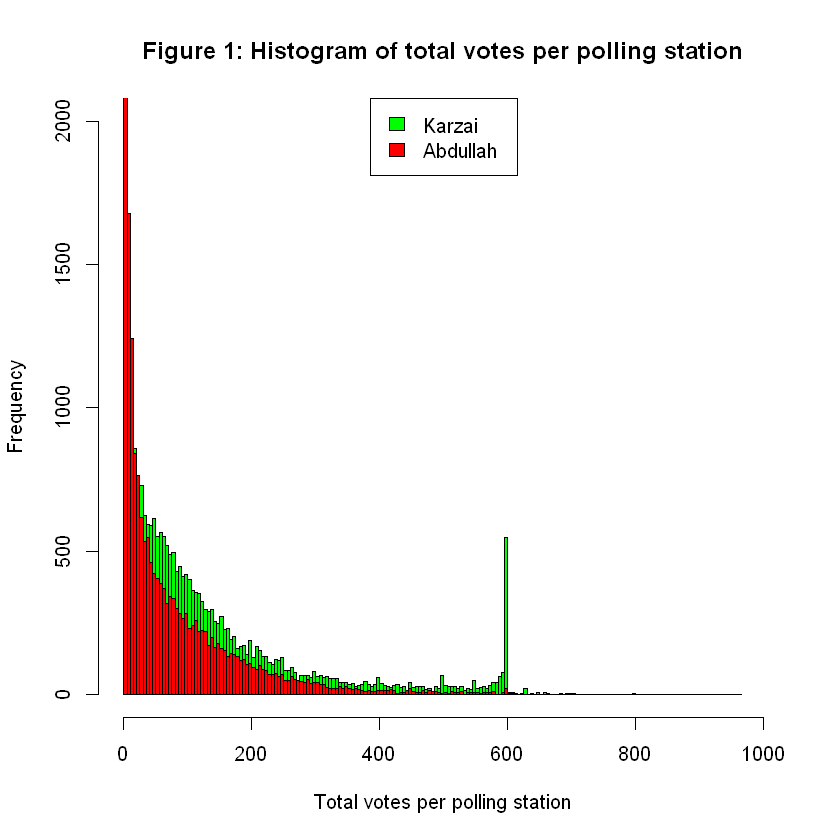

In [23]:
hist(Fraud[Fraud$Share_of_Karzai>0,]$Share_of_Karzai, freq=NULL, col="green", 
     main=paste("Figure 1: Histogram of total votes per polling station"), 
     breaks=150, xlim=c(0,1000), ylim=c(0,2000),
     xlab="Total votes per polling station") # Greein is Karzai

hist(Fraud[Fraud$Share_of_Abdullah>0,]$Share_of_Abdullah,freq=NULL, col="red", 
     main=paste("Figure 1: Histogram of total votes  polling station"), 
     breaks=150, xlim=c(0,1000), ylim=c(0,2000),
     xlab="Total votes per polling station", add=TRUE) # Red is Abdullah

legend('top', c('Karzai', 'Abdullah'), fill=c('green', 'red'))

Moreover, the incidence of stations where a candidate received more than 95 percent of the total vote share was equally unusual. Figure 2 shows that a substantially high number of stations (with more than 100 total vote cast) had exactly 100 percent vote share for single candidate (particularly Karzai).

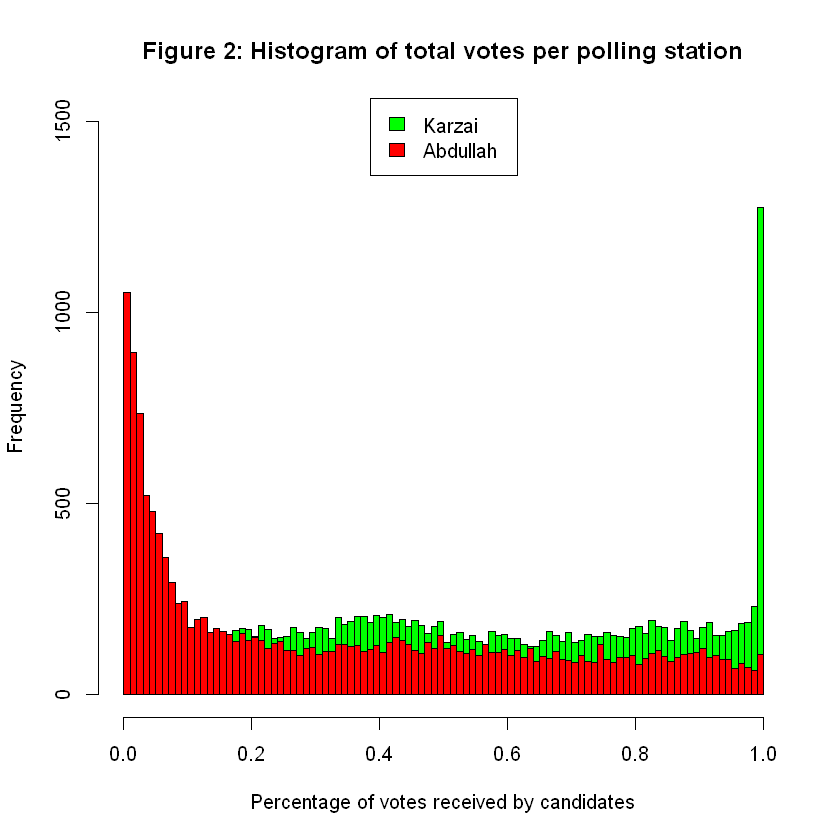

In [24]:
Fraud$total_votes <- rowSums(Fraud[,2:33])
Fraud$pc_Share_of_Karzai <- (Fraud$Share_of_Karzai/Fraud$total_votes)
Fraud$pc_Share_of_Abdullah <- (Fraud$Share_of_Abdullah/Fraud$total_votes) 

hist(Fraud[Fraud$pc_Share_of_Karzai>0 & Fraud$total_votes>=100,]$pc_Share_of_Karzai, freq=NULL, col="green", 
     main=paste("Figure 2: Histogram of total votes per polling station"), 
     breaks=100, xlim=c(0,1), ylim=c(0,1500),
     xlab="Percentage of votes received by candidates") # Greein is Karzai

hist(Fraud[Fraud$pc_Share_of_Abdullah>0 & Fraud$total_votes>=100,]$pc_Share_of_Abdullah,freq=NULL, col="red", 
     main=paste("Figure 2: Histogram of total votes  polling station"), 
     breaks=100, xlim=c(0,1), ylim=c(0,1500),
     xlab="Percentage of votes received by candidates", add=TRUE) # Red is Abdullah

legend('top', c('Karzai', 'Abdullah'), fill=c('green', 'red'))

ECC classified 3376 stations or nearly 15 percent of all stations as potentially fraudlent. ECC performed a partial audit of all suspected stations in order to determine whether runoff election is needed or not. To save time and to be less costly ECC randomly selected 10 percent of the qualifying stations for a detailed investigation. ECC created a "fraud coefficient" for each of the three categories mentioned above. Fraud coefficients are the percentage of votes to be fraudlent out of the total votes inspected within the category.

Two months after election day, ECC released the results of the audit by eliminating the suspected votes from the count. Hamid Karzai's vote share dropped from 54.6 to 49.67 percent, while the vote share of his main opponent, Abdullah Abdullah, went from 27.8 to 30.59 percent. According to the results, ECC ordered an immediate runoff election. However, runoff election did not happen, because the main candidate Abdullah withdrew his candidacy from the race.

# 3. Identification and Empirical Approach

### 3.1. Measuring of the Fraud

Gonzalez uses the list of polling stations that were subject to the audit and the ECC fraud categories to define the primary measure of fraud in his paper. As above described author first aggregates six categories used by the ECC to trigger an audit into three broader categories:

- *Category A* - stations with 600 or more votes cast

- *Category B* - stations in which one candidate received 95 percent or more of the total votes cast, and

- *Category C* - stations stations satisfying categories *A* and *B* above (look at the **Appendix 1** for detailed explanation).

Gonzalez defines two fraud outcomes. The first is *(i) Share of votes under Category C*, i.e., the polling-center- level vote share of stations that were under *Category C*. To be more precise, given a polling center *c* with total of *s* stations of which *n < s* qualify as *category C* and it is the measure of fraud at center *c* is given by the total number of votes in the n suspected stations divided by the total votes cast in center *c*. The second is *(ii) an indicator for whether polling center c has at least one diqualified polling station or station which is qualified as Category C*.

It is important to note that a station qualifies for one of the categories does not necessarily imply that fraud was committed in this station. For instance, some stations may have unusually high voter turnout rates or unusually strong prefrences for one specific candidate. In that case, this measure can be interpreted as a proxy for fraud. These proxies provide a precise signal on actual fraud given the context and design of the election. This type of measure has been previously used in the economics and cross validated with alternative measures of fraud in the same Afghan context (Weidmann and Callen 2013).

Cell phones are the main medium of communication in Afghanistan. Author uses Global System for Mobile communications (GSM) second-generation (2G) coverage maps to determine areas with cell phone coverage. This dataset is directly provided by cell phone operators to the GSM Association (GSMA) and distributed by Collins Bartholomew. The coverage maps indicate the areas receiving 2G coverage based on the spatial distribution of cell phone towers across Afghanistan. Specifically, coverage data are in the form of a map raster or grid file indicating cells where signal strength is at least - 100 decibel-milliwatts (dBm). This is *minimum received signal power* in GSM wireless networks, or roughly speaking, the minimum signal strength needed to be able to make a call (Figueiras and Frattasi 2010).

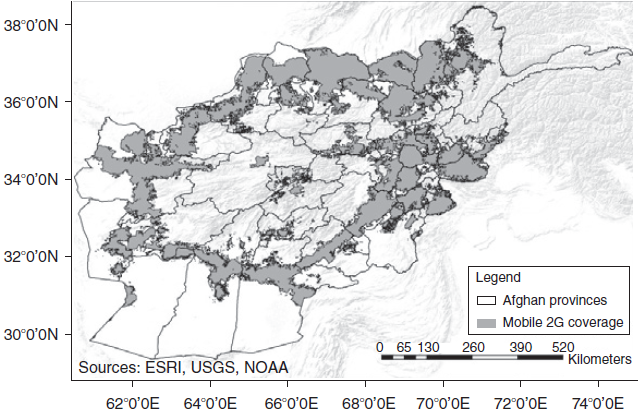

In [25]:
display_png(file="material/Figure3.png") 

**Figure 3** shows the 2G coverage raster file overlaid on a topographical map of Afghanistan. Shaded areas indicate areas with a signal strength of at least - 100 dBm. Unforunately, data on variation of the strength of coverage is not avaialable.  Collins Bartholomew provides information on two main  operators Mobile Telecommunications Network (MTN) and Afghan Wireless (AWCC). 46 percent (8 million) of all cell phone subscriptions in Afghansitan belongs to these two companies (Hamdard2012).

Author hihghlights two sources of cencern on the data of cell phone coverage in Afghanistan. 

First concern is the lack of data on other providers. The insufficiency of data on other providers may be a source of concern which can imply that covered areas may be wrongly classified. According to the maps provided by the Afghan Telecommunication Regulatory Authority (ATRA), there is a significant overlap in tower locations and service areas between MTN, AWCC , and the other operators. Section IID of original paper prsents results that account for the inclusion of Roshan (the largest operator in Afghanistan) in the coverage measure.

The second concern is the possiblity of operators overreporting coverage areas. The main reason of overreporting might be marketing purposes.However, coverage data submissions by operators are considered to be a service to the GSM Association. Operators provide data at no cost, which the GSM Association then uses to assess the state of the technology and sell it as a way of raising funds for the agency to operate. With this in mind, the data are restricted to the general public and require a contractual agreement to purchase and use for research. Therefore, it is unlikely that operators have an incentive to misreport coverage in such cases.

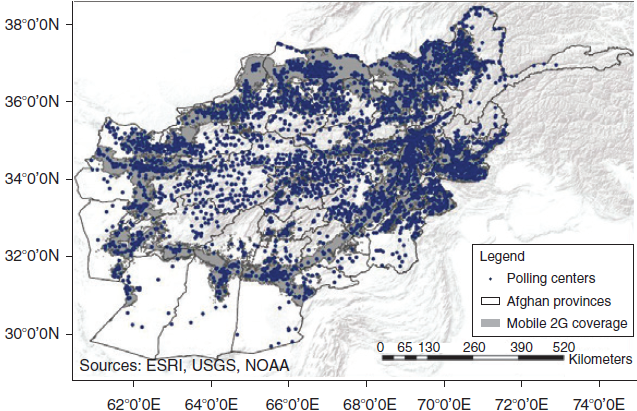

In [26]:
display_png(file="material/Figure4.png") 

**Figure 4** depicts the spatial distribution of polling centers along the voverage areas.

Gonzalez obtains data on the latitude and longitude of polling centers from an Independent Elections Commission (IEC)–led nationwide inspection of each polling center that took place less than a year after the 2009 presidential election. The purpose of the inspection was to assess the security status and accessibility of designated polling centers for the upcoming September 2010 parliamentary election. The assessments were conducted jointly by ISAF and Afghan National Security Force teams. Each assessment included four pieces of information: a polling center name and code, an MGRS grid providing the exact geographic location of the polling center, and a road accessibility status. Using the coordinates, he overlays the centers on the cell phone coverage map to determine each center’s coverage status. **Figure 4** depicts the spatial distribution of polling centers along the coverage areas.

### 3.2. Characteristics of Polling Centers

To create a sample containing the fraud measures per center along with the geographic location of the centers, author merges the 2010 center assessment data described above with the polling-center-level data on fraud outcomes described at the beginning of this section. The data are merged based on the polling center code and name.

In cases where the codes matched but the names did not (100 cases), the match was done based on the names only. The total sample consists of 6,160 polling center observations, for which 5,904 (95.8 percent) have coordinates obtained directly
from the 2010 assessment. For the remaining 256 centers, coordinates were imputed as follows: 169 (2.7 percent) used the centroid coordinates of the village or settlement where the center was located, 81 (1.3 percent) used the coordinates of the center with the identifier code closest to it, and, lastly, 6 (0.1 percent) simply used the coordinates of the district capital where the center was located.

Gonzalez (2021) uses the released electoral results to obtain additional election-related outcomes: the number of expected voters prior to election day, the total votes cast at the center, the total number of stations per center, the voter turnout rate, and the percentages received by the two main candidates.14 These data are complemented with preelection
data published by the IEC on polling center type (school, mosque, or other) along with the share of stations within a center designated to women and Kuchis, a minority ethnic group. Geographic and economic development characteristics of the area where each center is located are extracted using geographic information system resources. 

Specifically, author calculates distances from polling centers to primary and secondary roads, district hospitals, basic health centers, and primary and secondary rivers using vector files collected by the Afghanistan Information Management Service (AIMS) and obtained from the Empirical Studies of Conflict Project (AIMS 1997–2005). Information on exogenous geographic characteristics such as polling center elevation and slope is obtained from NASA’s Shuttle Radar Topography Mission (SRTM30) (National Aeronautics and Space Administration and the National Geospatial Intelligence Agency 2000).

Lastly, demographic data on the population and ethnic composition around the location of the polling center comes from the Measuring Impacts of Stabilization Initiatives (MISTI) project sponsored by the US Agency for International Development (USAID). The MISTI project (MISTIs 2013) includes geographic coordinates and compiles demographic data from various data sources between the years 2012 and 2013 for more than 37,000 villages across Afghanistan. Using these data, Gonzalez (2021) creates variables indicating the population size and the language spoken (“Pashto,” “Dari,” and “Other”) in the village or settlement closest to the polling center.

### 3.3. Regression Discontuinity Design (RDD)

Figure 3 shows two main characteristics of cell phone coverage: *(i)* cell phone coverage is a discontinuous function of latitude and longitude, *(ii)* changes from coverage to noncoverage areas define a two-dimensional boundary along the latitude-longitude space. According to this, author suggests to use a spatial regression discontinuity (RD) design to take an advantage of the discontinuity in polling centers’ cell phone access to estimate the effect of coverage on various election fraud outcomes. Gonzalez (2021) presents results using two approaches: 
First, he follows the usual approach in the literature by specifying a one-dimensional forcing variable, namely the distance to the closest point in the coverage boundary. This is the equivalent of subtracting the cutoff value from the forcing variable in the one-dimensional design and then using this transformed forcing variable to estimate a single, boundary-wide average effect.
Second, he exploits the two-dimensional nature of the coverage boundary to estimate boundary treatment effects at various points along the treatment boundary following Imbens and Zajonc (2011). Look at the **Appendix 2** for full explanation about the boundry RDD.

One-dimensional forcing variable approach's equation looks in the following way:
$$ v_{f,ij} = \gamma +\beta D_{ij} +g(X_{ij}) + \Omega_i +\epsilon_{ij},                     \quad (1) $$     
where: 

$v_{f,ij}$ denotes a fraud measure for polling center *j* in boundary segment *i*, 

$D_{ij}$ is an indicator equaling one if the center lies within the coverage area. otherwise zero,

$X_{ij}$ is the geographic coordinate of center *j* in segment *i* ,

$\Omega_i$ is a boundary segment fixed effect that ensures that we are comparing polling centers that are within the same segment of the coverage boundary. In addition, to satisfy the boundary positivity assumption described in Imbens and Zajonc (2011), we drop any boundary segments with polling centers on only one side of the coverage boundary. This ensures that, within each segment, there are polling centers on the noncoverage side to serve as counterfactuals for treated polling centers.

$\epsilon_{ij}$ is the error term. It is an important to note that this error term is clustered error term. Later I revisit to explain the difference between clustered vs. nonclustered standard errors in this model,

$g(X_{ij})$ is the RD polynomial and sample restrictions which varies with different specifications of  equation $(1)$. 

First, Author uses $$g(X_{ij})= \alpha \times dist_{ij} +\delta D_{ij} \times dist_{ij},$$  where the forcing variable $dist_{ij}$ denotes the Euclidean distance between polling center j and the closest point on the coverage boundary. This specification estimates separate lines on each side of the coverage boundary, with the estimation sample restricted to polling centers falling within a bandwidth around the coverage boundary that is chosen optimally following Calonico, Cattaneo, and Titiunik (2014). 

Second he follows a more parametric approach that uses all observations on either side of the coverage boundary by allowing a more flexible form for the RD polynomial via using higher order polynomials in distance to the boundary. For instance, the RD polynomial of order *K* is given by $$g(X_{ij})=\sum_{k=1}^{K} \alpha_k \times dist_{ij}^k +\delta_k D_{ij} \times dist_{ij}^k.$$  The optimal order of the chosen polynomial specification is determined using Akaike’s criterion as in Black, Galdo, and Smith (2007) and suggested in Lee and Lemieux (2010). RD coefficient $\beta$ gives the causal effect of cell phone coverage on fraud for areas in close proximity to the coverage boundary.

Now it is time to visually understand the eqaution $(1)$.

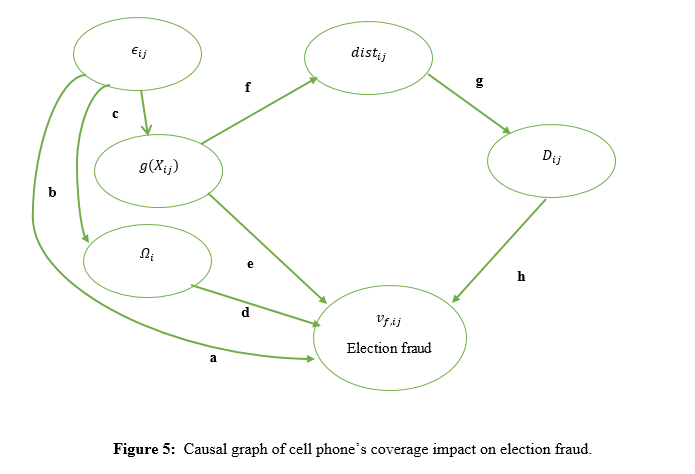

In [27]:
display_png(file="material/Figure5.png") 

**Figure 5** depicts the causal graph of cell phone's coverage on election fraud, where:
**a** shows the direct impact of error term $\epsilon_{ij}$ on election fraud $v_{f,ij}$. Moreover, error term $\epsilon_{ij}$ directly impact on segment fixed effects $\Omega_i$ and polynomial (sample) restrictions $g(X_{ij})$. These connections are represented by lines **b** and **c** respictively. In addition, error terms can indirectly impact on election fraud through segments and polynomial restrictions, since error terms are clustered. Clustered error terms can be reached by grouping polling centers according to their segments and ID codes. **d** node shows that segment fixed effects directly impact on election fraud. Segment fixed effects serve for control for comparison polling centers that are within the same segment of the coverage boundary. **e** shows the direct dependence of election fraud on polynomial and sample restrictions $g(X_{ij})$. Moreover, $g(X_{ij})$ can be assigned to coverage and noncoverage area by the cutoff point $dist_{ij}$.  **f** shows the direct dependence of polynomials and sample restrictions of polling centers on cutoff point. After passing or not passing of polynomials (sample) restrictions of polling centers from cutoff point, they accept $D_{ij}=1$ if polling center located in coverage area otherwise  $D_{ij}=0$. **g** node shows the assigning of polling centers into treatment or control groups. At the end, **h** shows the direct impact of $D_{ij}$ on election fraud.
Moreover, author uses two approaches of identifying the polynomial and sample restrictions. These two approaches, i.e., optimal bandwidth and polynomial order specifations don't change the postion of polynomial (sample) restricitons $g(X_{ij})$ in **Figure 5**.

### 3.4. Validity of RDD

Author creates a sample data which contains the fraud measures per center along with the geograhic loaction of the centers. After merging the 2010 center assessment data described above with the polling-center-level data on fraud outcomes described at the beginning of this section, Author gets the following database. However, I have added some variables such as polynomials of **dist** (distance), **lat** (latitude), **lon** (longtitude) and th others to the original data that presented by author. Original data which called **fraud_pcenter_final_dta** has 6160 by 99 dimension. The data which I present has 6160 by 130 dimension. Adding those variables to the data doesn't impact on final results.

In [28]:
head(votedata)
dim(votedata)

pccode,pccode2010,pcname,province,province_id,districtid,nvoters,totalps_av,frnum_v600,frnum_p95,...,dist4,dist5,dist6,dist7,lat2,lat3,lat4,lon2,lon3,lon4
101078,101078,Zayed Bin Haris.,Kabul,1,101,3400,7,0,5,...,315105.32,7465685.0,176881981,4190805710,1192.145,41161.72,1421209,4769.905,329431.1,22751994
101498,101498,Black 8 Ahamd shah baba female School,Kabul,1,101,1200,3,1,0,...,36239.98,500017.2,6898933,95187284,1191.599,41133.46,1419908,4794.836,332017.2,22990448
101186,101186,"qabil boy,qabil boy high school",Kabul,1,101,2700,5,0,0,...,82179.16,1391400.4,23558224,398871472,1192.082,41158.49,1421060,4786.307,331131.8,22908738
101176,101176,"hood khail,hood khail high school",Kabul,1,101,5000,9,2,2,...,98877.76,1753368.8,31091948,551343926,1193.133,41212.90,1423566,4788.229,331331.2,22927135
101033,101033,"deh bori,mahmod hotaky high school",Kabul,1,101,7200,12,0,0,...,142541.33,2769657.0,53815972,1045674195,1191.049,41104.98,1418598,4778.062,330276.5,22829877
101256,101256,"behinde oil tank barchi, etiahaad masque",Kabul,1,101,1500,3,0,0,...,68604.42,1110299.4,17969174,290814549,1192.464,41178.25,1421970,4790.265,331542.6,22946636


[1] 6160  130

Look at the **Appendix 3** for detailed varibles that used in mean comparisons and in estimating the causal effects of cell phone access on election fraud.

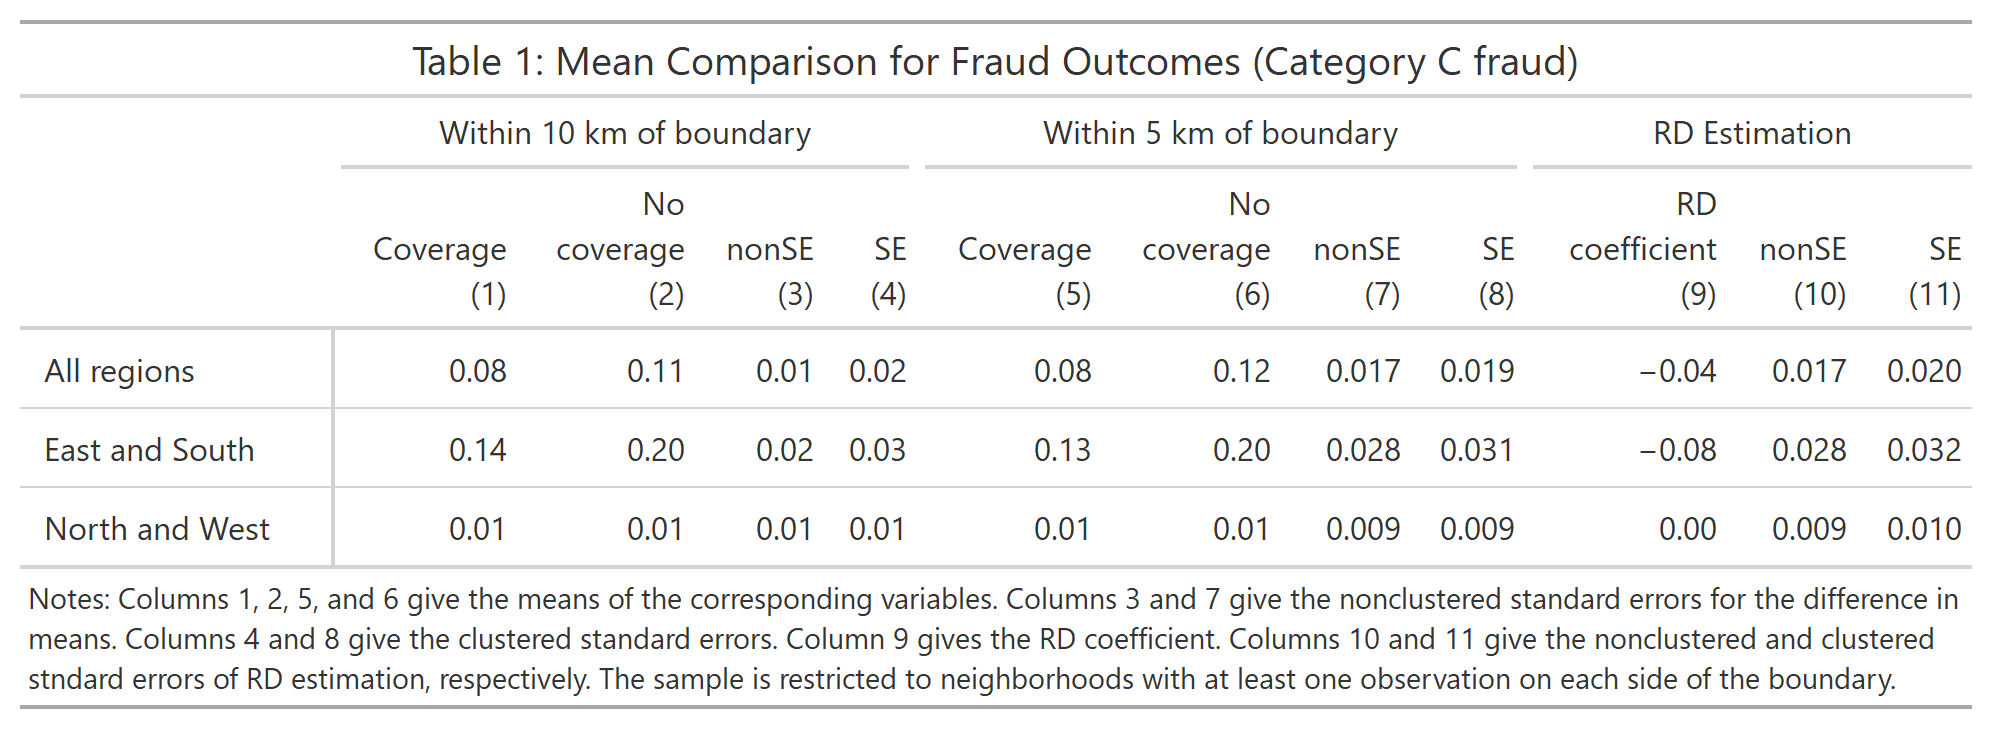

In [29]:
source("auxiliary/Table_1.R")

Identification of $\tau( b_i )$ (look at the **Appendix 2** for the explanation of $\tau( b_i )$) requires a key assumption: potential outcome functions $  E [{v_f(1)|X}]$ and  $E[{v_f(0)|X}]$ must be continuous at point $b_i$ in the treatment boundary, where one and zero denote assignment and nonassignment into treatment, respectively. Simply put, polling center characteristics must transition smoothly across the treatment boundary. This assumption allows for centers in the noncoverage side to serve as a valid counterfactual for centers in the coverage side.

**Table 1** assesses the validity of the design by estimating RD coefficients for polling centers on each side of the coverage boundary. Columns 1 and 5 report the mean for polling centers within cell phone coverage areas for bandwidths of 10 km and 5 km, respectively. Columns 2 and 6 report the mean for centers in noncoverage areas within the specified bandwidths. Columns 3 and 6 report the nonclustered standard error of the difference in means between covered and noncovered centers. Column 9 presents the results from an RD analysis that estimates equation $(1)$ within a 5 km bandwidth using each of the specified covariates in **Table 1** as the outcome variable. It is an important to note that nonclustered standard errors are alway higher than clustered standard errors. The main reason is that model should be clustered along the segment area in order to compare the polling centers are within the same segment of coverage boundary.
It is interesting to note that differences across the boundary for the fraud outcome variable remain economically and statistically significant as the bandwidth decreases. Note that the results exhibit a high degree of spatial variation with centers in the southeast showing significant differences, while differences in the northwest region are indistinguishable from zero. For this reason, the main analysis presented in **Section 4.2** will be performed separately by southeast and nortwest regions.

Now it is time to look at mean comparisons of the main characteristics of polling centers.

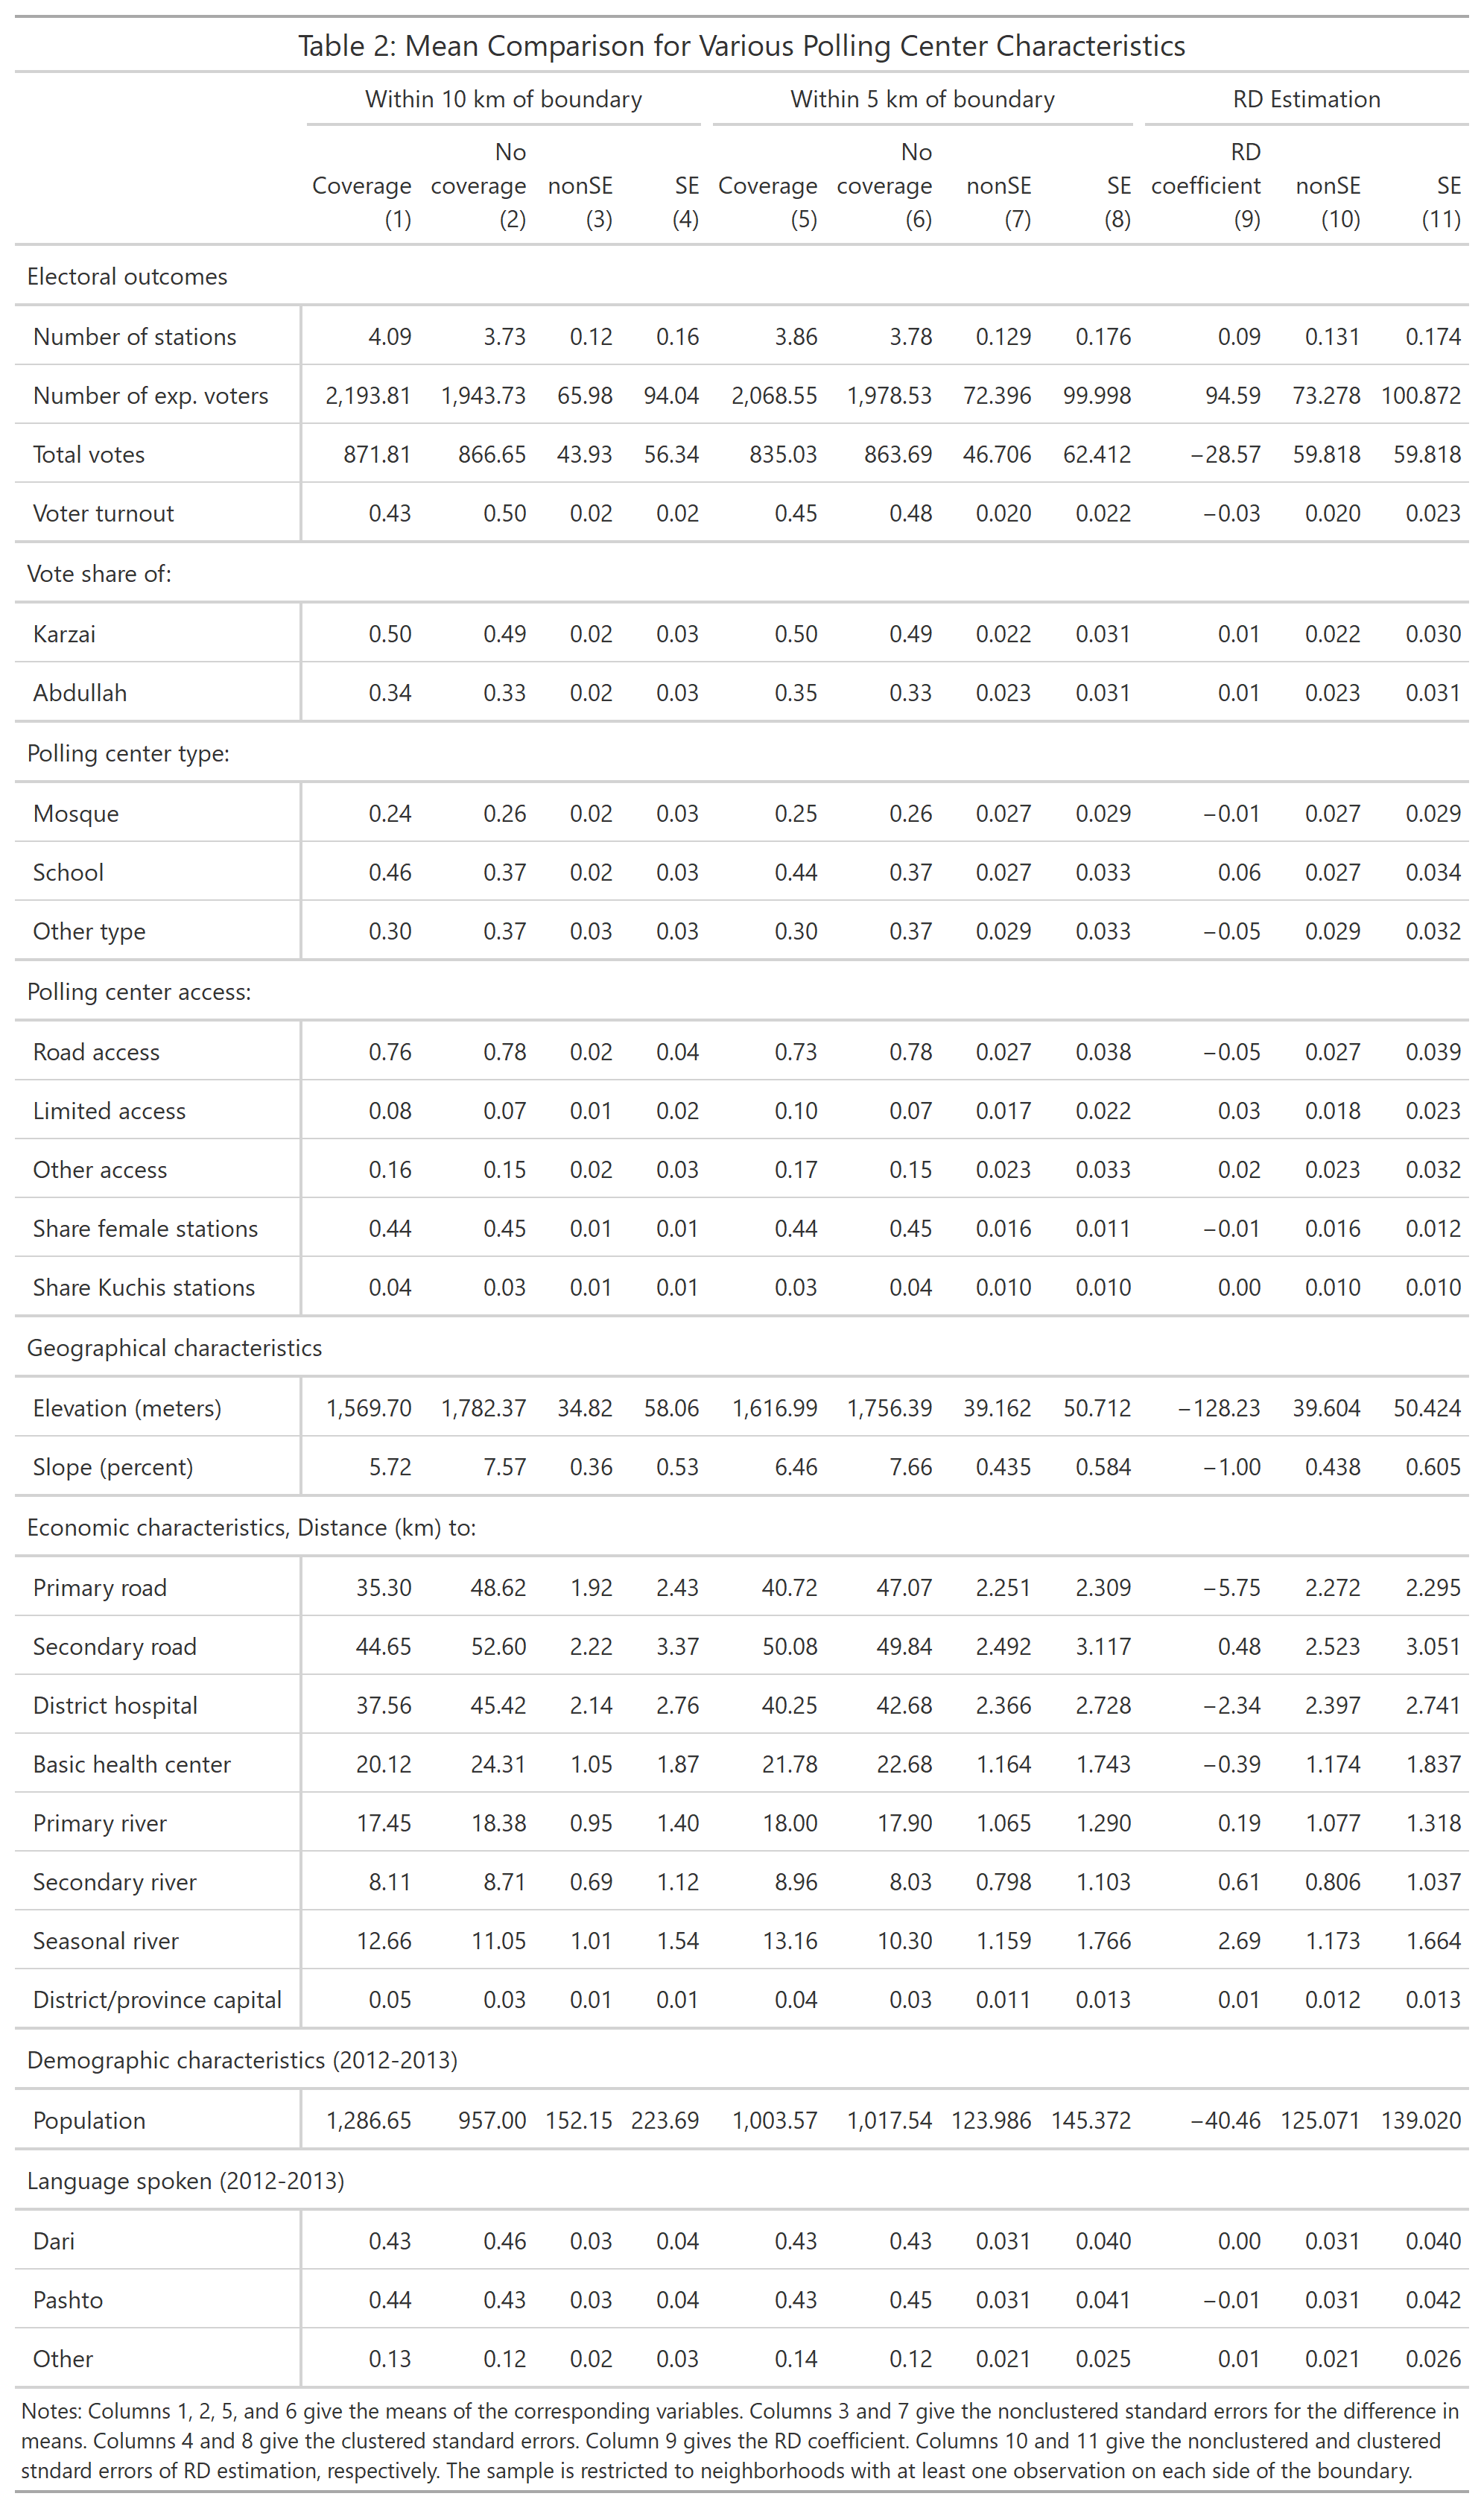

In [30]:
source("auxiliary/Table_2.R")

**Table 2** assesses the validity of the design by comparing electoral outcomes and geographic, economic, and demographic characteristics for centers on each side of the coverage boundary. Columns 1 and 5 report the mean for polling centers within cell phone coverage areas for bandwidths of 10 km and 5 km, respectively. Columns 2 and 6 report the mean for centers in noncoverage areas within the specified bandwidths. Columns 3 and 7 report the clustered standard error of the difference in means between covered and noncovered centers. Columns 4 and 8 report the nonclustered standard error.

Most importantly in terms of RD design validity, notice that, unlike the fraud measure (in **Table 1**), most differences in polling center characteristics become relatively small and statistically insignificant as the bandwidth decreases.
To offer a more rigorous assessment, column 9 presents the results from an RD analysis that estimates equation $(1)$ within a 5 km bandwidth using each of the specified covariates in **Table 1** as the outcome variable. Similar to the mean difference results, the RD exercise shows that, unlike the fraud measure, center characteristics transition smoothly across the boundary for the most part. In all, 24 out of the 28 baseline characteristics tested result in statistically insignificant differences between covered and noncovered centers.

Polling center elevation, slope, and distance to the closest primary road are notable exceptions. Cell phone coverage depends on topographical features; thus, it is plausible that coverage drops in areas with significant changes in elevation and slope. Similarly, primary road access is affected by the ruggedness of the terrain. In spite of these changes across the boundary, robustness checks show that the main RD results in **Section 4.2** are not sensitive to the inclusion of these covariates.

To further assess the validity of the identifying assumption, Gonzalez (2021) performs Cattaneo, Jansson, and Ma’s (2019) recent test for breaks in the density of the forcing variable at the treatment boundary and find no evidence of endogenous assignment of  polling centers or sorting of villages near the boundary. In the context of this study, however, endogenous sorting of centers close to the boundary is not a cause of concern, since polling center locations were determined primarily by the location of settlements rather than by cell phone coverage. In addition, locations were determined entirely by the UN-led IEC; thus, manipulation of the process by potentially corrupt candidates is unlikely. Similarly, the absence of selective sorting of villages near the coverage boundary is institutionally plausible. Afghanistan experienced a
period of rapid expansion in cell phone coverage throughout the second half of the 2000s. With this in mind, the incentives for households to move to a village that has coverage are very low when coverage might soon reach that household’s village.

# 4. Results

### 4.1. Graphical Analysis

In terms of graphical analysis of RD, I don't produce replication codes and I use the given plots in original paper. If you are interested in coding and further detailed information, then you can have alook at the original paper. Author begins the analysis by graphically plotting the relationship between electoral fraud and cell phone coverage using the RD plots of outcome variables.

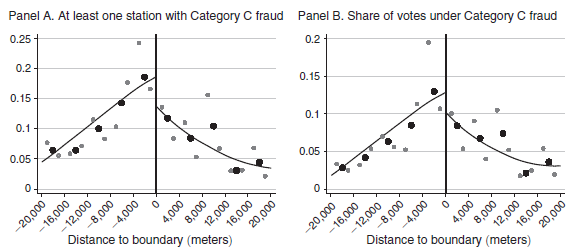

In [31]:
display_png(file="material/Figure6.png") 

Notes: Solid dots give the average share of votes classifying in Category C fraud for polling centers falling within
4,000-meter distance bins. Hollow dots give the average share of votes classifying in Category C fraud for polling
centers falling within 2,000-meter distance bins.  “Distance to boundary” refers to the distance between a polling center and the closest point in the cell phone coverage boundary. “Negative” values of distance give the distance of polling centers/villages in noncoverage areas. The solid line trends give the predicted values from a regression of the outcome variable on a second-degree polynomial in distance to the boundary that uses a triangular kernel and a bandwidth of 20,000 meters.

Panel A in **Figure 5** plots the likelihood that a polling center has at least one station with Category C fraud. **Figure 5**, panel B plots the average share of Category C fraud votes per polling center. The figures provide two levels of smoothing: solid dots represent the averages of the outcome variables for 4 km distance bins, while hollow dots use 2 km distance bins. Negative values of distance indicate polling centers in noncoverage areas. The solid line trends give the predicted values from a regression of the outcome variable on a second-degree polynomial in distance to the boundary. The window of analysis is 20 km on each side of the boundary, and the regressions are estimated separately on each side.

The RD plots show that, within a narrow window around the coverage threshold, there is a clear drop in the levels of fraud for centers located on the coverage side. The likelihood of a polling center reporting fraud drops by about 5 percentage points (**Figure 5**, panel A), while the average share of fraudulent votes drops by about 2.5 percentage points (**Figure 5**, panel B). In relative terms, these are economically significant drops considering the average values in centers on the noncoverage side. Note that fraud levels also decrease gradually with coverage. There is also a decrease in fraud levels on the noncoverage side as one moves away from the boundary. This is likely attributed to fraud being less attractive as one moves into areas with smaller populations.

### 4.2. Results of one-dimensional RDD

First, author shows the main results from the one-dimensional RD design that estimates the causal impact of cell phone coverage on election fraud using equation $(1)$. One-dimensional RD design estimates the causal effect by using the *(i)* distance as a forcing variable and *(ii)* polynomials in distance. Moreover, author does estimation by dividing the Category C fraud into: *stations which at least one station with Category C fraud* (this type of stations is denoted as **vote_comb_ind** in the dataset **fraud_pcenter_final_dta**) and *share of votes under Category C farud* (this type of measure is denoted as **vote_comb** in the dataset **fraud_pcenter_final_dta**). 

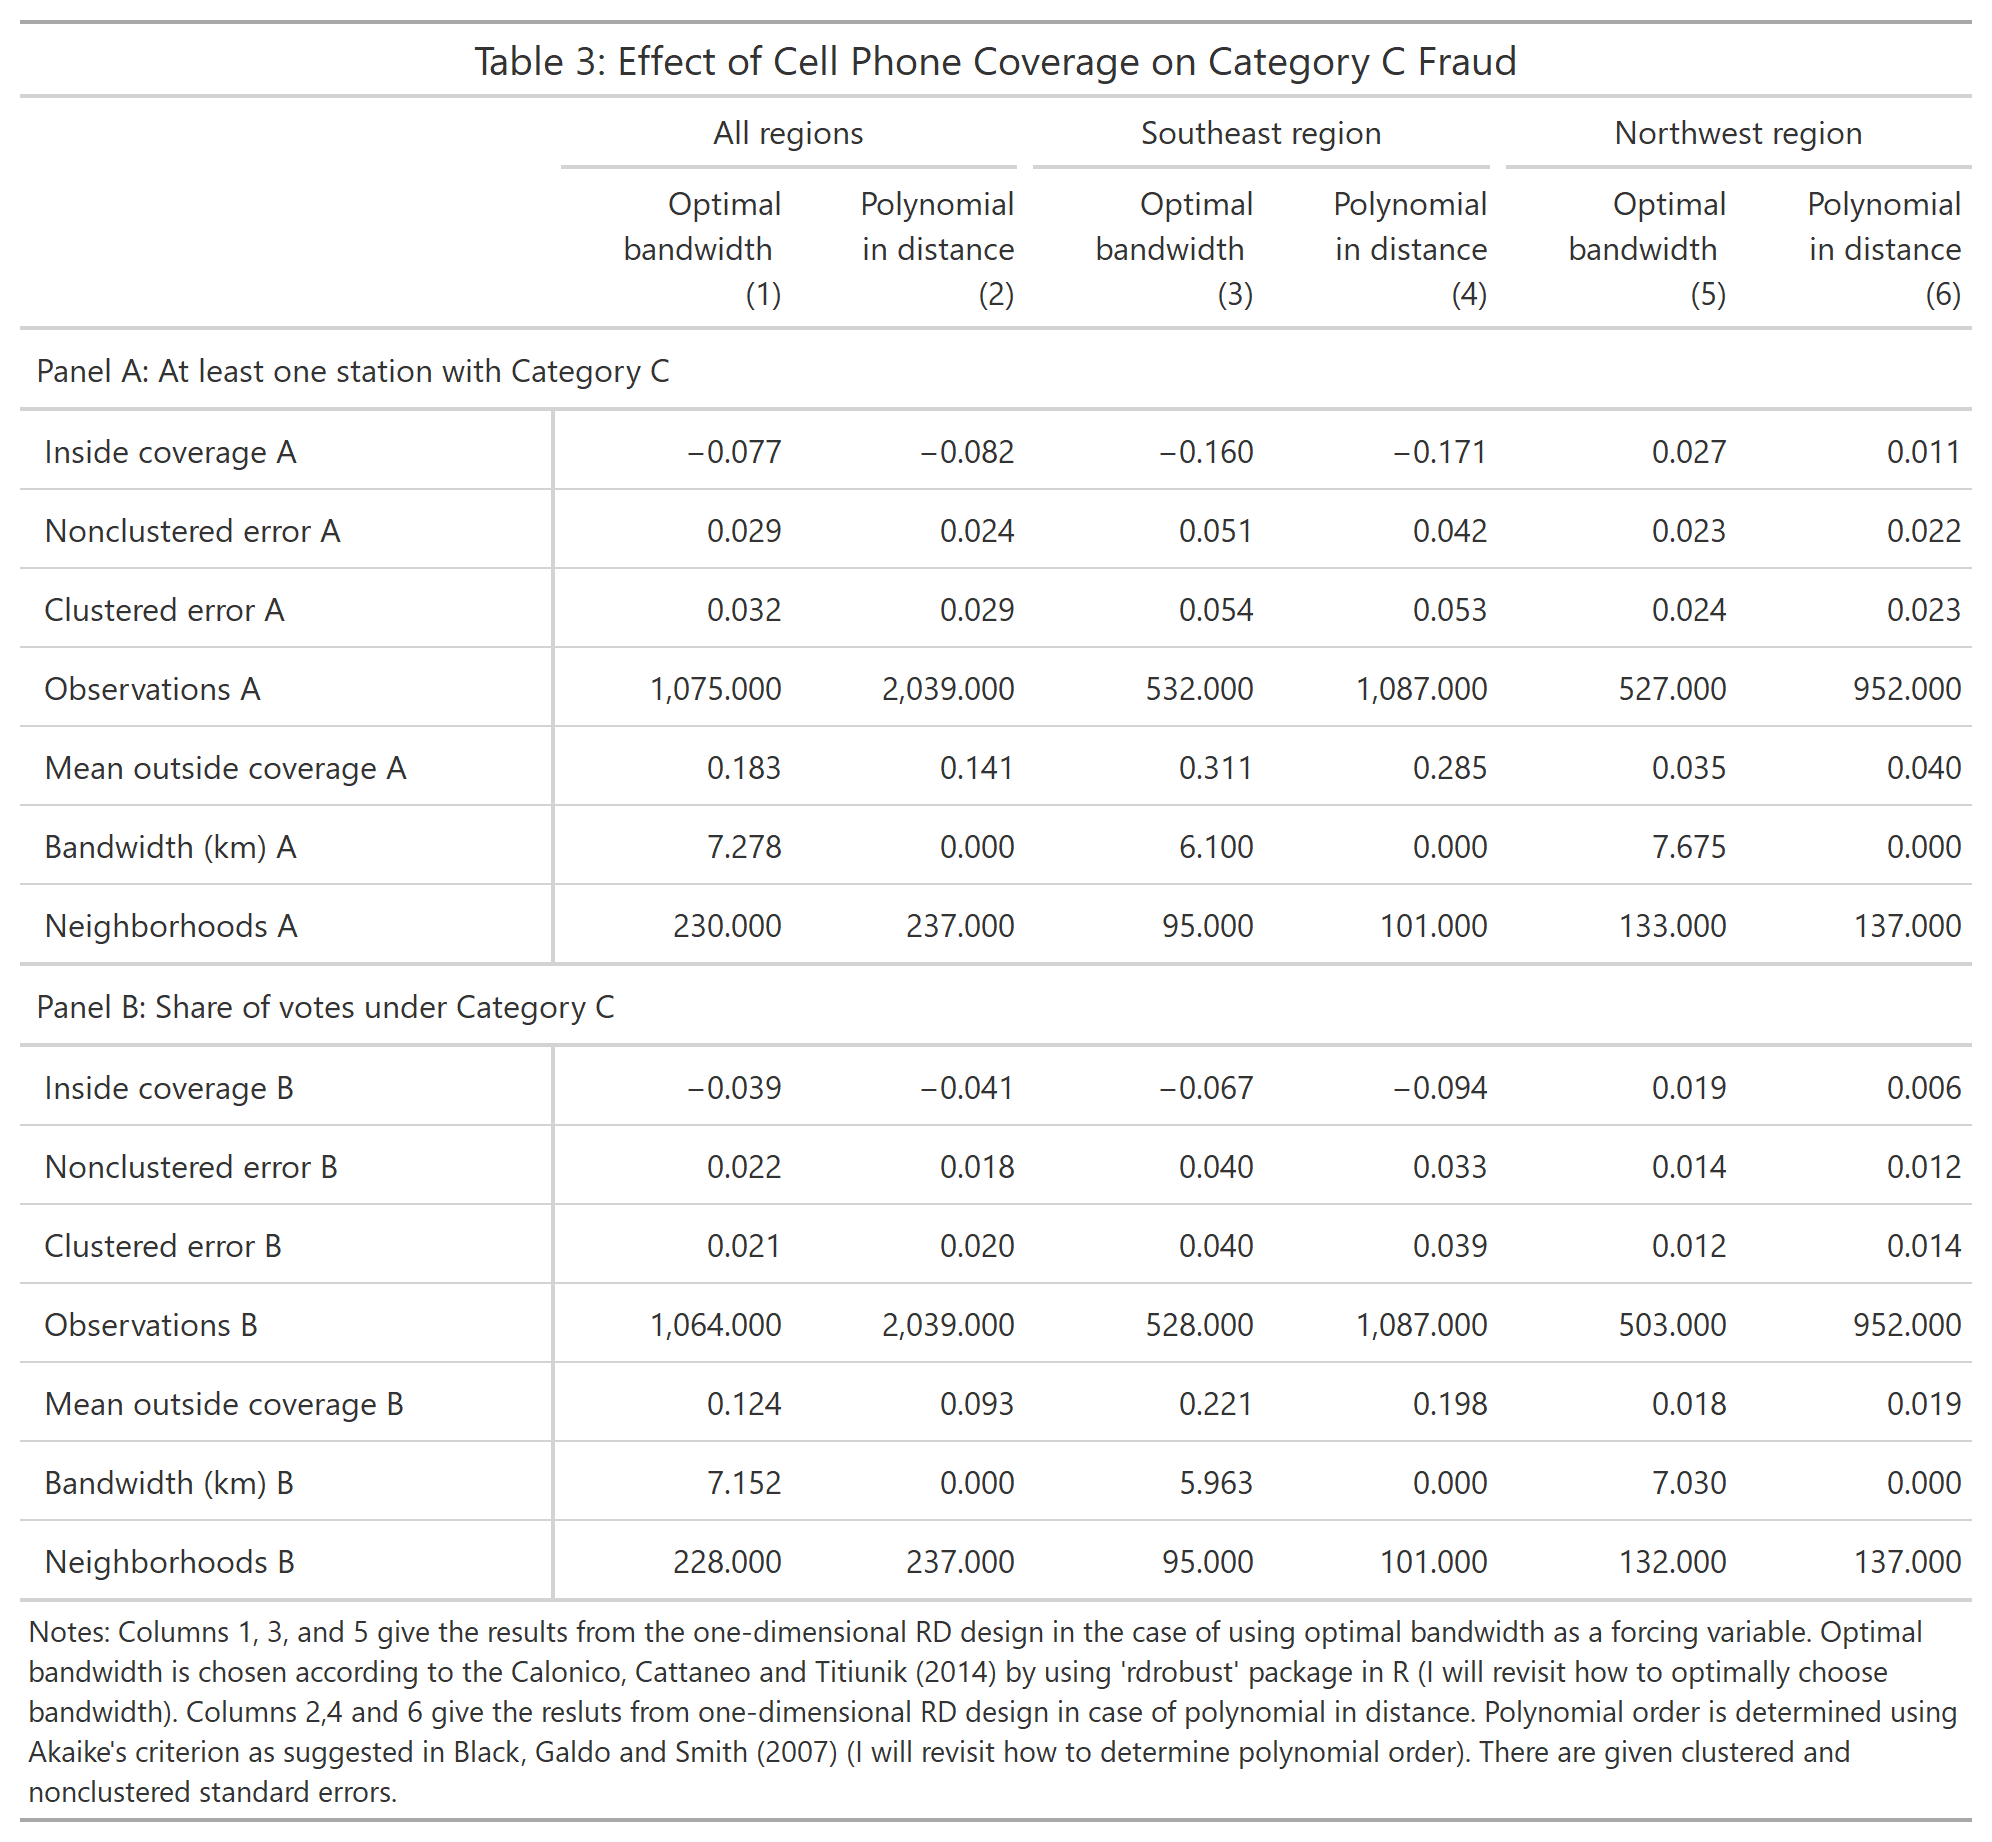

In [32]:
source("auxiliary/Table_3.R")

Columns (1), (3) and (5) in **Table 3** show the results using distance to the coverage boundary as the forcing variable and restricting analysis to an optimal bandwidth around the coverage boundary. Results in cloumn (1) show that electoral fraud considerably decreases for the polling center within cell phone coverage area. The number of fraudulent polling stations decreseas by 7.7 percent for the polling centers with 7.278 km bandwidth in cell phone coverage area. The total share of votes under Category C farud decreases by 4 percent for the polling centers with 7.125 km bandwidth which located on the side of coverage area.

Polling centers in southeastern regions have statistically significant drops in fraud. For instance, the number of fraudulent polling stations decreases by 16 and 17 percent for the polling centers with 6.100 km bandwidth and with the 3rd of polynomial order, respictively. This significant drop in farud has happened because of a high degree of spatial hetrogeneity in the results of Column (3) and (5). However, polling centers that located in the northwestern provines experience with almost zero in reducing the electoral fraud. The main reason is that fraud levels in the northwest were much lower than the fraud levels in southeast.

Comparison of nonclustered and clustered standard errors shows that in all regrission cases clustered standard errors are higher than nonclustered. In theory, smaller values in standard errors are considered better because it indicates that the observations are closer to the fitted values. However, clustered standard errors are presented in original paper because one-dimensional RD design in equation (1) captures the variation of polling stations among boundary segments.

Results in columns (2), (4) and (6) shows the results from one-dimensional RD design in case of using the polynomial distance as a forcing variable. These results are almost the same with the results that obtained from the optimal bandwidth specification. The number of fraudulent polling stations drops by 8 percent, while the share of fraudulent votes drops by 4 percent in cell phone coverage areas.



### 4.2.1 Results of one-dimensional RDD with changing optimal bandwidth

Author highlights that resluts are robust to the different choices of bandwidth, polynomial order, clutering of the standard errors. In addition, he does extra robustness check by substituting the district fixed effects for segment fixed effects which used in main text in equation $(1)$.
Optimal bandwidth is chosen according to the Calonico, Cattaneo, and Titiunik (2014). Now, it is time to look at how to optimally choose the bandwidth for the stations which at least one station with Category C farud and share of votes under Category C fraud. There is a "rdrobust" package in R which is used to calculate the optimal bandwidth. It follows from the equation: $$g(X_{ij})= \alpha \times dist_{ij} +\delta D_{ij} \times dist_{ij},$$  where the forcing variable $dist_{ij}$ denotes the Euclidean distance between polling center j and the closest point on the coverage boundary.

In [33]:
# Panel A
# Optimal bandwidth selection

All_A_optimal <- summary(rdbwselect(y=votedata$vote_comb_ind, x=votedata$temp, kernel="triangular", vce="hc0",
                   cluster=votedata$segment50, subset=votedata$ind_seg50==1, all=TRUE))
# 7.278
Southeast_A_optimal <- summary(rdbwselect(y=votedata$vote_comb_ind, x=votedata$temp,  kernel="triangular", vce="hc0",
                                    cluster=votedata$segment50, subset=votedata$ind_seg50==1 & votedata$region2==1, all=TRUE))
#6.100
Northwest_A_optimal <- summary(rdbwselect(y=votedata$vote_comb_ind, x=votedata$temp,  kernel="triangular", vce="hc0",
                                    cluster=votedata$segment50, subset=votedata$ind_seg50==1 & votedata$region2==2, all=TRUE))
# 7.675


Call: rdbwselect

Number of Obs.                 2039
BW type                         All
Kernel                   Triangular
VCE method                      HC0

Number of Obs.                 679        1360
Order est. (p)                   1           1
Order bias  (q)                  2           2

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
     mserd     7.278      7.278     13.127     13.127
    msetwo    11.018      9.430     20.911     13.466
    msesum     8.302      8.302     12.949     12.949
  msecomb1     7.278      7.278     12.949     12.949
  msecomb2     8.302      8.302     13.127     13.127
     cerrd     5.367      5.367     13.127     13.127
    certwo     8.126      6.955     20.911     13.466
    cersum     6.123      6.123     12.949     12.949
  cercomb1     5.367      5.367     12.949     12.949
  cercomb2     6.123      6.123     13.127     13.127
Call: rdbwselect

Number of Obs.                 1087
B

In [34]:
# Panel B
# Optimal bandwidth selection

All_B_optimal <- summary(rdbwselect(y=votedata$vote_comb, x=votedata$temp, kernel="triangular", vce="hc0", bwselect="mserd",
                                    cluster=votedata$segment50, subset=votedata$ind_seg50==1, all=TRUE))
# 7.152

Southeast_B_optimal <- summary(rdbwselect(y=votedata$vote_comb, x=votedata$temp,  kernel="triangular", vce="hc0", 
                                          cluster=votedata$segment50, subset=votedata$ind_seg50==1 & votedata$region2==1, all=TRUE))
# 5.963

Northwest_B_optimal <- summary(rdbwselect(y=votedata$vote_comb, x=votedata$temp,  kernel="triangular", vce="hc0", 
                                          cluster=votedata$segment50, subset=votedata$ind_seg50==1 & votedata$region2==2,all=TRUE))

Call: rdbwselect

Number of Obs.                 2039
BW type                         All
Kernel                   Triangular
VCE method                      HC0

Number of Obs.                 679        1360
Order est. (p)                   1           1
Order bias  (q)                  2           2

                  BW est. (h)    BW bias (b)
            Left of c Right of c  Left of c Right of c
     mserd     7.152      7.152     13.137     13.137
    msetwo    11.291      9.477     21.120     13.571
    msesum     8.267      8.267     12.923     12.923
  msecomb1     7.152      7.152     12.923     12.923
  msecomb2     8.267      8.267     13.137     13.137
     cerrd     5.275      5.275     13.137     13.137
    certwo     8.327      6.989     21.120     13.571
    cersum     6.097      6.097     12.923     12.923
  cercomb1     5.275      5.275     12.923     12.923
  cercomb2     6.097      6.097     13.137     13.137
Call: rdbwselect

Number of Obs.                 1087
B

The above given codes show the all available optimal bandwidths for the stations that at least one station with Category C fraud and share of votes under Category C fraud for all, southeast and nortwest regions. Author uses **mserd** type of bandwidth and **mserd** is one common MSE (mean squared error)-optimal bandwidth selector for the RD treatment effect estimator. In addition, **vce** is used to compute the variance-covariance matrix estimator. When I specify **vce** is as **hc0** (for heteroskedasticity-robust plug-in residuals variance estimator without weights) then I can get the same optimal bandwidths which are given in the Table 2 of the original paper.

After obtaining all available optimal bandwidth, it is time to estimate the causal impact of cell phone coverage on election fraud for the stations that at least one station with Category C and share of votes under Category C farud in all, southwest and nortwest regions. Now, I use **"cerrd"** optimal bandwidth and **"cerrd"** is one common CER (Coverage Error Rate)-optimal bandwidth selector for the RD treatment effect estimator.

In [35]:
source("auxiliary/Table_4.R")


Table 4: Effect of Cell phone coverage on Category C Fraud
                                          Dependent variable:                          
                -----------------------------------------------------------------------
                 At least one station with Category C fraud  Share of Votes under category C
                     All         Southeast       Nortwest      All   Southeast Nortwest
                     (1)            (2)            (3)         (4)      (5)      (6)   
---------------------------------------------------------------------------------------
Inside coverage    -0.068**      -0.125***        0.022      -0.028   -0.037    0.009  
                   (0.033)        (0.035)        (0.025)     (0.056)  (0.039)  (0.025) 
---------------------------------------------------------------------------------------
Observations         940            479            444         940      479      444   
R2                  0.016          0.052          0.007

**Table 4** shows almost same results with **Table 3** results from one-dimensional RD design with optimal bandwidth specification. In particular, the number of fraudulent polling stations (in all regions) with 5.367 km bandwidth drops by 6.8 percent. Fraudulent of southeast polling stations with 4.702 km bandwidth drops by 12.5 percent. Results for the share of votes under category C farud are also similar to the results which presented in **Table 3**.
As author highlighted that resluts are robust to the changing the optimal bandwidth. (I check the all available optimal bandwidths and results are robust). In addition, you can look at the Appendix of original paper to have a look for detailed information.

### 4.2.2 Results of one-dimensional RDD with changing the polynomial order

Now it is time to check the robustness of results by changing the polynomial order of one-dimensional RDD. Author chooses the  RD polynomial of order *K* is given by: $$g(X_{ij})=\sum_{k=1}^{K} \alpha_k \times dist_{ij}^k +\delta_k D_{ij} \times dist_{ij}^k.$$  The optimal order of the chosen polynomial specification is determined using Akaike’s criterion as in Black, Galdo, and Smith (2007) and suggested in Lee and Lemieux (2010). Author defines K=3 as the polynomial order. It is important to note that Gelman, A., and Imbens, G. (2019) suggests not to use in regression discontinuity analysis to control for high order (third, fourth,or higher) polynomials of the forcing variable because estimators can be misleading. They recommend use estimators based on local linear or quadratic polynomials or other smooth functions instead of usinh higher order of polynomials.

Now I use 4th polynomial order (K=4) in equation $(1)$ and analyse results.

In [36]:
source("auxiliary/Table_5.R")


Table 5: Effect of Cell phone coverage on Category C Fraud
                                          Dependent variable:                          
                -----------------------------------------------------------------------
                 At least one station with Category C fraud  Share of Votes under category C
                      All         Southeast      Nortwest      All   Southeast Nortwest
                      (1)            (2)            (3)        (4)      (5)      (6)   
---------------------------------------------------------------------------------------
Inside coverage    -0.091***      -0.160***        0.020     -0.048* -0.073***  0.013  
                    (0.027)        (0.033)        (0.061)    (0.026)  (0.023)  (0.043) 
---------------------------------------------------------------------------------------
Observations         2,039          1,087           952       2,039    1,087     952   
R2                   0.011          0.034          0.00

Results in **Table 5** show that changing the polynomial order of one-dimensional RDD is robust to the main results in **Table 3**. Author also highlights in his paper that changing the polynomial order doesn't hugely impact on the main results. **Table 5** shows one interisting thing about the significant drop in share of votes under Category C farud in all and southest regions. Still the change in electoral farud for the polling stations that located in covearge is almost zero. 

Later author calculated results for spatial RD design boundary.To see the results look at the **Appendix 4**

# 5. Extentions

In terms of the extention the model, I run the model without segment fixed effect and look at the results. Equation $(1)$ is RD design with one fixed effect which is boundary segment fixed effects that controls for comparison of polling centers within the same segemnt of the coverage boundary.

First, I omit the segment fixed effects the equation $(1)$ and run it. After omitting the segment fixed effects, one-dimensional RD design looks the following way: $$ v_{f,ij} = \gamma +\beta D_{ij} +g(X_{ij}) +\epsilon_{ij},                     \quad (2) $$ 
After identifying the one-dimensional RD without fixed effects, it is time to look at the it's causal graph

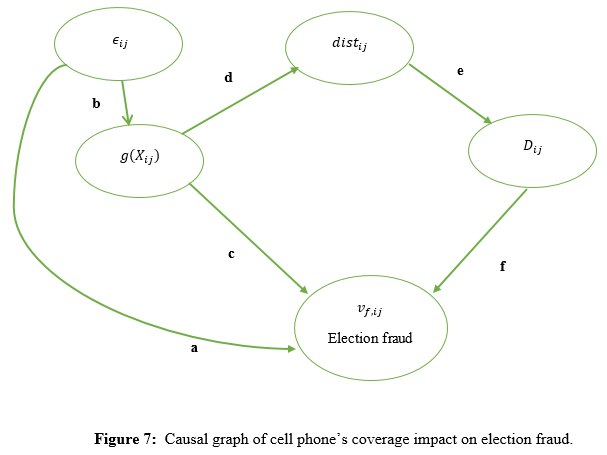

In [37]:
display_png(file="material/Figure7.png") 

**Figure 7** shows that error terms can directly impact on election fraud (**a**) and polynomial (sample) restrictions of polling centers $g(X_{ij}$ (**b**). **c** shows the direct impact of $g(X_{ij}$ on election fraud and at the same time this direct imapct is considered to errors terms as an indirect impact on election farud. Error terms are clustered. In addition,  polynomial (sample) restrictions has indirect impact on election fraud through cutoff point $dist_{ij}$. Cutoff point assigns polling centers into treatment and control groups, then these two groups directly impact on election fraud.

I need adjust this line of code: **table6_insideA_All <- plm(vote_comb_ind~cov*dist, data=subset(votedata, ind_seg50==1 & dist<=7.278), model="within", index=c("segment50", "pccode"))** to get results for equation $(2)$. I remove **ind_seg50==1** restrictions from the code in order to omit $\Omega_i$ in model. However, when I define optimal bandwidth for variable **dist** I need to calculate new optimal bandwidth for the model without segment fixed effects which I did in **Section 4.2.1**. I use the new calculated optimal bandwidth by using the method which was introdeuced in **Section 4.2.1.**. However, results are robust to changing of the optimal bandwidth. So, using the original optimal bandwidths or new optimal bandwidths doesn't strongly impact on results. Moreover, author also hihlighted in his paper and I also have checked for all available optimal bandwidths.

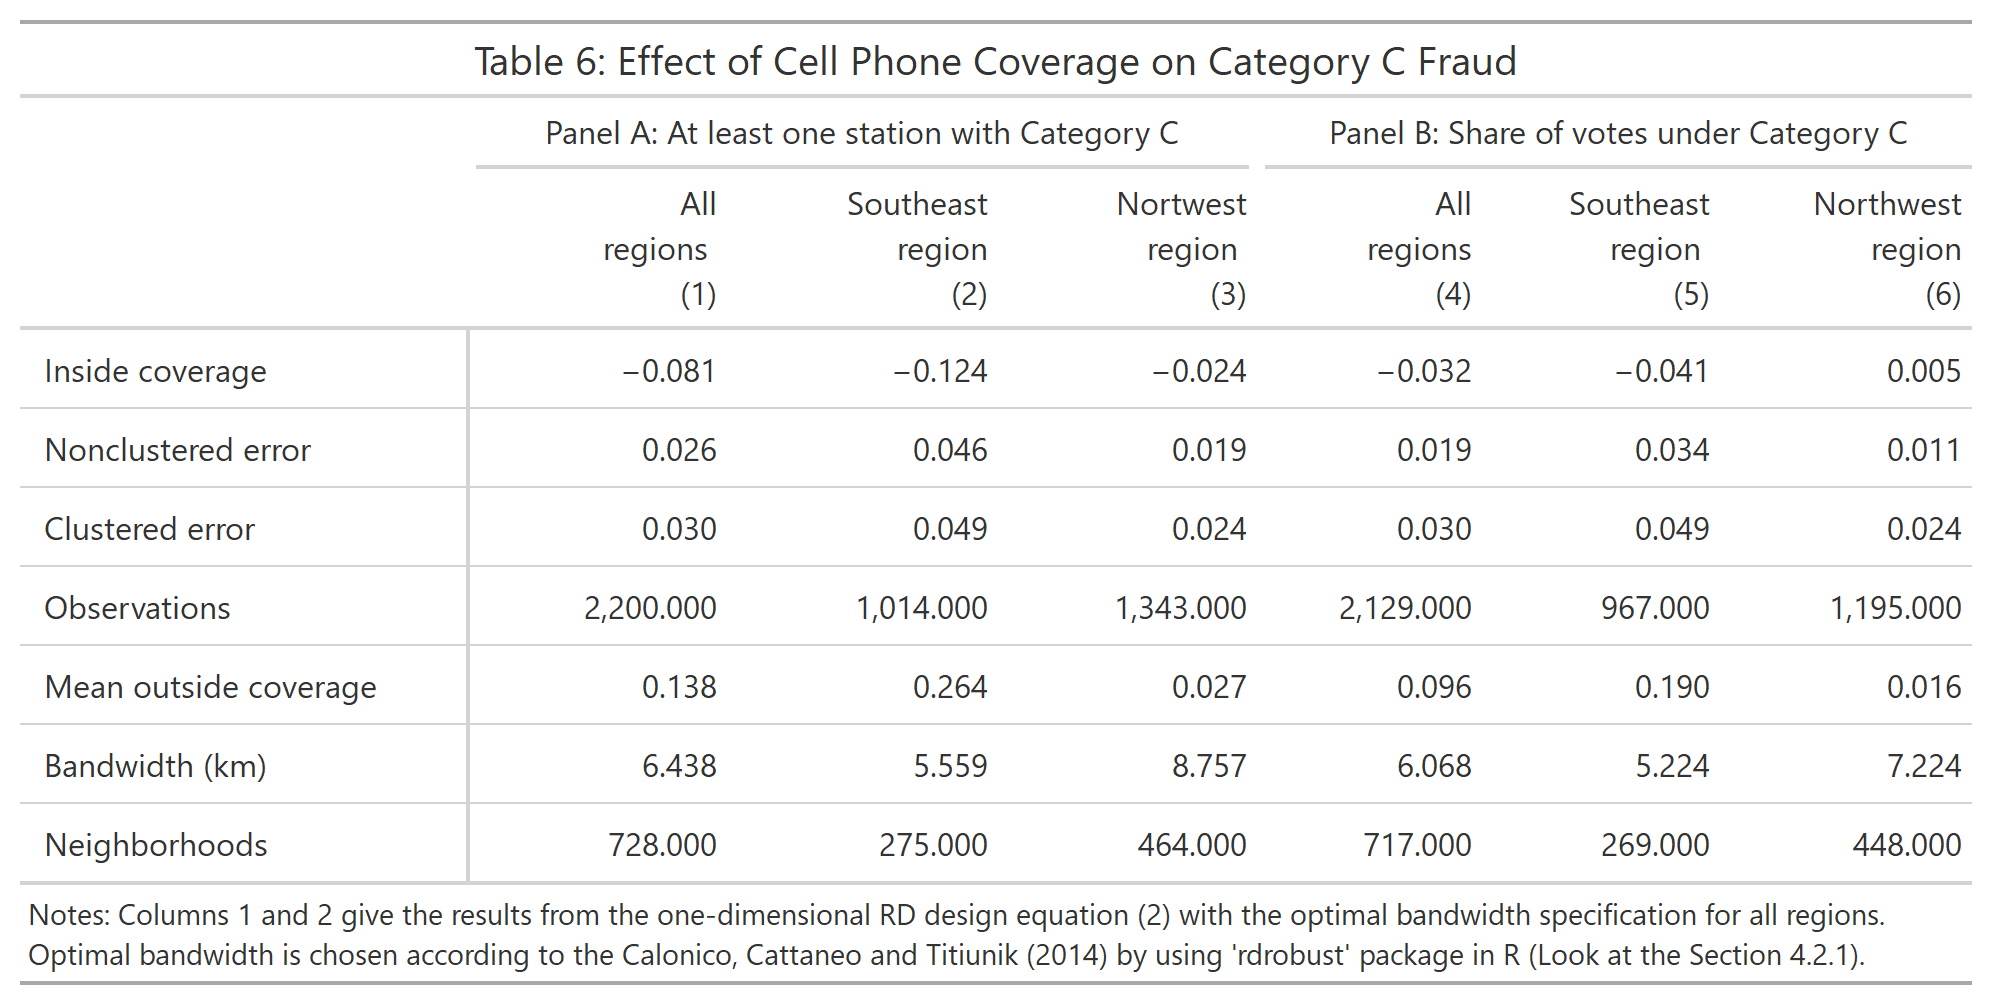

In [38]:
source("auxiliary/Table_6.R")

**Table 6** shows the results from equation $(2)$ with optimal bandwidth specification. According to these results, I can say that results that presented in original papers are robust to omitting the segment fixed effects from the model which is given in eauation $(1)$. Omitting segment fixed effect in equation $(1)$ with polynomial specifications perform almost the same results. Only negligible changes happened in increasing the number of observations and neighborhoods, because omitting segment fixed effects reduces the restrictions and allows to include more polling stations. Nonclustered standard errors are smaller than clustered errors in all cases. 

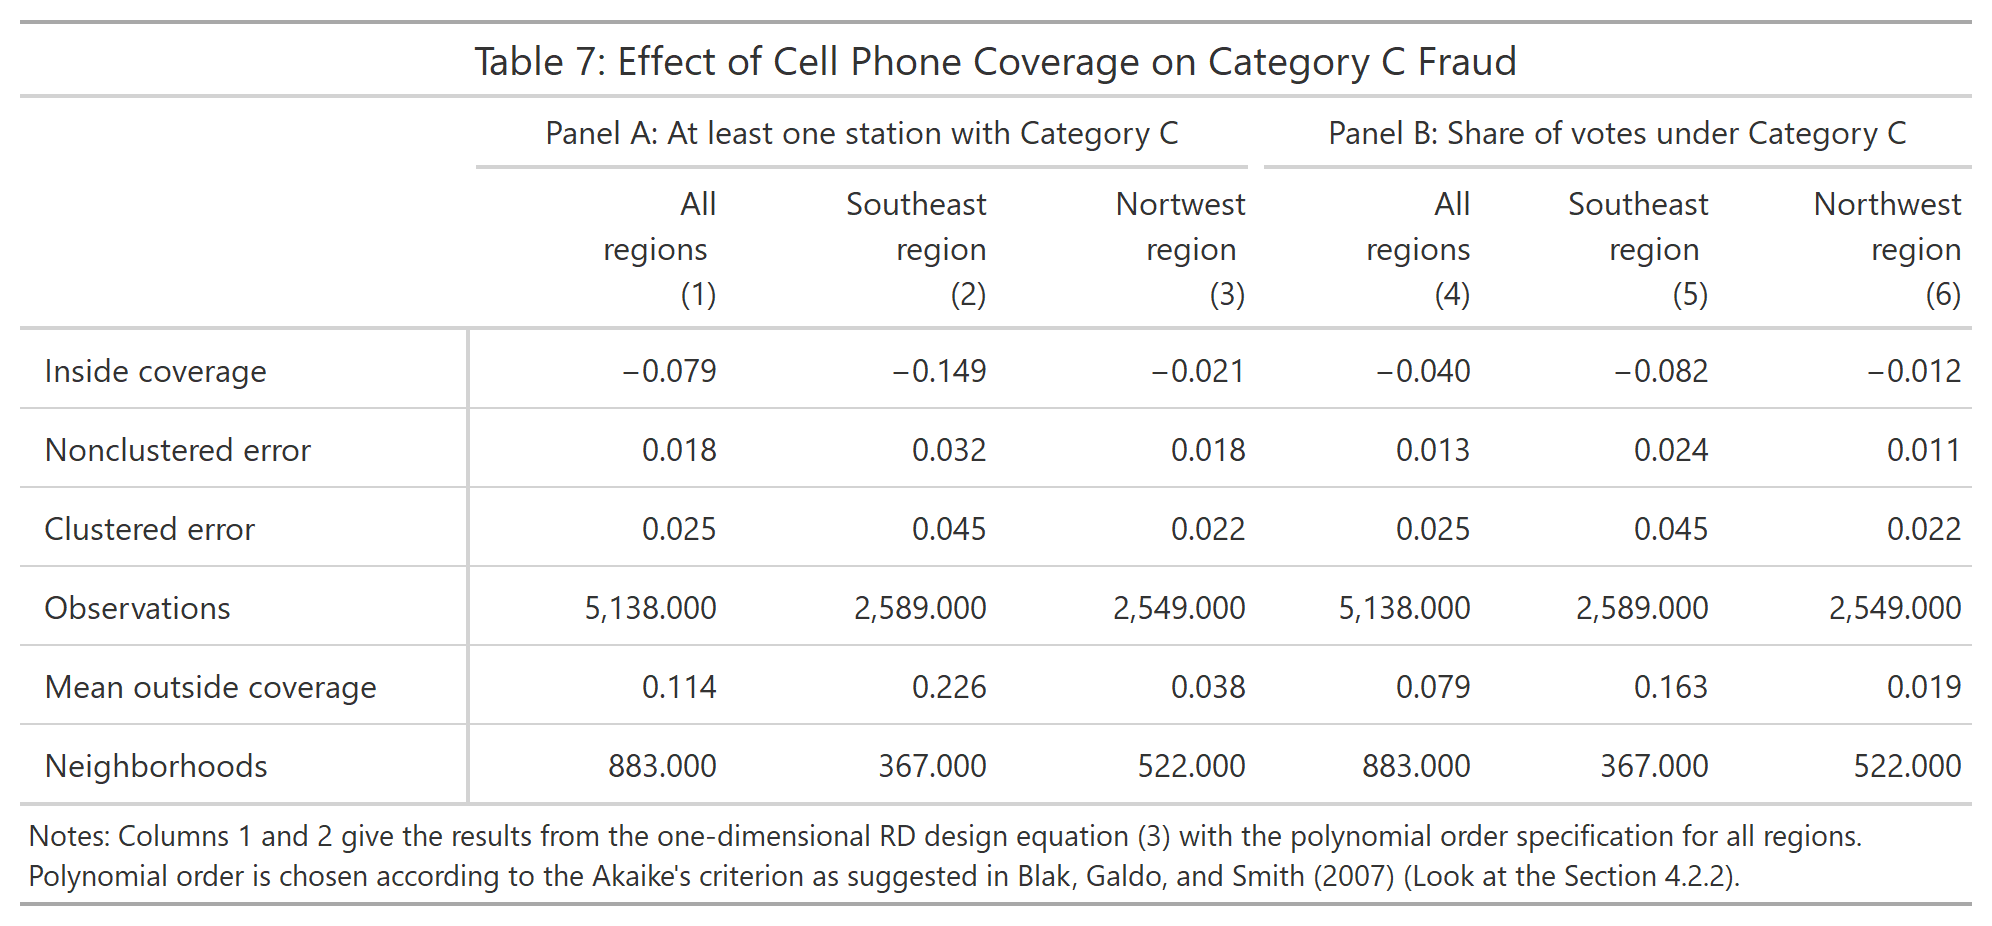

In [39]:
source("auxiliary/Table_7.R")

**Table 7** presents results from one dimensional RD design with omitting fixed effect and polynomial order specifications. As **Table 6** shows that the negligable changes are in number of observations and neighborhoods. It is important to note that results in **Table 7** are similar to the results in **Table 3**.

After checking the model by omitting fixed effects, it is visible that model was constructed very well and it is robust to all posiible additional checks such as changing the optimal bandwidth, polynomial orders, dividing the polling centers into regions and the others. 

# 6. Further Research Directions on the Effect of Cell Phone Coverage on Election Fraud in Afghanistan

According to the data availabilty, this research might be further studied in the future. It could be nice to take into account the following characteristics of sample:
- Time of the phone calls about the complaints. Segment fixed effects of model which is given in $(1)$ only controls for the comparison of polling centers that are within the same segment for the coverage boundary. If this model includes time fixed effects that control for any changes in the evolution of the breaking the polling process's rules, then this model can also answer whether election fraud depends on time or not. In addition, it is important to note that complaints were received during the polling and counting periods.
- Education level of population. This can solve two potential problems *(i)* citizens who are from the cell phone coverage areas cannot report about the breaking the election rules due to not knowing how to use a phone *(ii)* or some citizens may not know how to properly fill polling ballots. Moreover, 2009 Afghan Presidential election had very low turnout, since 15,3 thousand voters were regestired but 4,6 thousand were cast. However, one of the main reason of such a low turnout is insurgent attacks to polling centers. According to the some researches on education and political participation, education advancement causes greater political participation. Keep this is in mind, another reason of the low vote turnout might be the education level of population.
- Income level of population. As defined, people reported about the breaking of polling rules via cell phones. One more thing about the coverage area is that cell phone coverage doesn't mean that citiznes, who are from coverage area, have cell phones which they can call to report about the irrugelarities of polling process. 

It is important to note that while extending this model (which is given in equation $(1)$ ) by including the above mentioned variables, those mentioned variables should be represented in the form of distance since model's forcing variable is a distance.

# 7. Conclusion

The resluts show that cell phone coverage reduces the electoral fraud. It is important to note that because of spatial hetrogeneity drops in election fraud for polling centers that located in southeast significantly differ from the drop in election fraud for northwest region. Overall, this model is robust to all possible robust checks, even omitting segment fixed effects from the model. Average drop in share of votes under Category C fraud is 4 percent while drop in number of fraudulent polling centers is approximately 8 percent. These numbers can vary according to the changing of the specifications but they don't change strongly.

This research shows one of the new approach in deterring the corrupt behavior by using the spatial RD design. In future, including the variable that can control the time-invariance of election fraud could suggest additional results.

# Appendix

### Appendix 1

In its final report of the 2009 election (Electoral Complaints Commission, 2010), the ECC reported that after receiving an increasing number of complaints on ballot stuffing and other irregularities, they decided on September 8, 2009 to conduct an audit of polling stations nationwide. To this end, they ordered the IEC to conduct an audit and recount of stations satisfying the following criteria:

• A1: Stations in which 600 or more valid votes were cast

• B1: Stations with more than 100 votes in which one candidate received 95 percent or more of the total votes cast

• C1: Stations satisfying both A1 and B1

After the initial samples were drawn, however, three additional categories were created due to a misunderstanding of the ECC orders by the IEC. The three new categories expanded the scope of the audit. The categories were:

• A2: Stations with 600 or more votes cast (Excluding those in A1)

• B2: Stations in which a candidate received 95 percent or more of the total valid votes cast (Excluding those in B1)

• C2: Stations satisfying both A2 and B2

After the audit process, the IEC reported that 3,376 stations classified in at least one of these categories. Out of this sample, the ECC and IEC investigated 10 percent of the ballots within each category. Some of the physical indicators used to determine fraud were whether the ballot box was tampered, all required materials were included, visual inspection of the ballots, reviews of the tally results and the actual ballot counts, among others. For the purpose of this study I aggregate the
six categories described above into three broader categories:

• Category A: Stations with 600 or more votes cast. Defined as A1+A2+C1+C2 from the categories above.

• Category B: Stations in which one candidate received 95 percent or more of the total votes cast. Defined as B1+B2+C1+C2

• Category C: Stations satisfying Categories A and B above. Defined as C1+C2.

The number of polling stations within each category is 1,706 in category A (545 from A1 + 299 from A2 + 741 from C1 + 121 from C2), 2,532 in category B (1269 from B1 + 401 from B2 + 741 from C1 + 121 from C2), and 862 in category C (741 from C1 + 121 from C2).

### Appendix 2

The second approach estimates treatment effects using observations within a neighborhood of a specific point in the treatment boundary. This exercise is then repeated for various points along this boundary, thus providing a distribution of these effects along this dimension. However, since there are not enough observations within several neighborhoods to allow for consistent estimation of the boundary treatment effects at each point, author proposes a modification that uses all available observations.
More specifically, let $ \mathcal{C} $ and $ \mathcal{B}  =bd(\mathcal{C} ) $ denote the cell phone coverage area and its boundary, respectively. Polling center j receives treatment assignment (i.e.,coverage) if its corresponding coordinate vector $x_j = ( longitude_j , latitude_j )$ falls within the coverage area $ \mathcal{C}  $. Let $b_i$ with *i = 1, … , I* denote the coordinate vector of point *i* on the treatment boundary $\mathcal{B}$. Furthermore, let $ N_{h}(b_i) $ denote a neighborhood of size *h* km around this point, with $ N_{h}^{+}(b_i) $  and $ N_{h}^{-}(b_i) $  denoting the subset of this
neighborhood that falls on the coverage and noncoverage sides of the boundary, respectively. As shown in Imbens and Zajonc (2011), the boundary treatment effect at point $b_i$ , denoted as $\tau( b_i )$ is therefore given by
 $$ \tau( b_i ) =\lim_{X\to b_{i}} E[v_{f}|X \in N_{h}^{+}(b_i)] - \lim_{X\to b_{i}} E[v_{f}|X \in N_{h}^{-}(b_i)],  \quad  (A1)$$
where $v_f$ is a measure of electoral fraud. An estimate of $ \tau( b_i )$ can be obtained by estimating separate lines on each side of the coverage boundary. More specifically, author estimates $$ v_{f,ij} = \gamma +\beta D_{ij} +X_{ij}^{'}\alpha + D_{ij} X_{ij}^{'}\delta+ \Omega_i +\epsilon_{ij},                     \quad (A2) $$ for centers within *h* km of the coverage boundary and where:

$v_{f,ij}$ denotes a fraud measure for polling center *j* in neighborhood *i* ,

$D_{ij}$ is an indicator equaling one if the center lies within the coverage area, 

$X_{ij}$ is the geographic coordinate of center *j* in neighborhood *i* , 

and $\Omega_i$ is a neighborhood fixed effect. The inclusion of neighborhood fixed effects ensures that I am comparing centers that are within a neighborhood of the boundary point. Author chooses *h* optimally, as in Calonico, Cattaneo, and Titiunik (2014). Lastly, to comply with the boundary positivity assumption discussed in Imbens and Zajonc (2011), he restricts the sample to only neighborhoods with at least one polling center on each side of the coverage boundary.

From equation $(A2)$, and under certain conditions, a consistent estimator for $ \tau( b_i )$ is given by

 $$ \hat{\tau}(b_i) = \hat{\beta} + b^{'}_{i} \hat{\delta}  \quad (A3)$$

Such conditions are discussed in detail in the following section. In order to evaluate the treatment effect at various points in the boundary, I follow Imbens and Zajonc (2011) by choosing a number of evenly spaced boundary points $b_i$ that cover the boundary reasonably well. Gonzalez (2021) highlights a point regarding the modification proposed above: estimation of the boundary treatment effects follows from using the actual levels of the forcing variable (i.e., latitude and longitude) rather than the normalized levels (i.e., the distance to the boundary) as it is usually done in the literature and in the scalar RD method described above. Simply put, this is the equivalent of not subtracting the treatment threshold from the forcing variable in the one- dimensional case. From the estimation equation $(2)$, this guarantees an estimate of the treatment effect that depends on specific values of the forcing variables at the boundary (i.e, the coordinate of boundary point $b_i$ ).

Lastly, Author uses the estimated boundary treatment effects from equation $(A3)$ to estimate a boundary- wide average effect, $\tau$ , as $$ \hat{\tau} = \frac{\sum_{i=1}^{I}\hat{\tau}(b_i) \times \hat{f}(b_i)}{\sum_{i=1}^{I}\hat{f}(b_i)} \quad (A4)$$ where

$\hat{f}(\cdot)$ is the estimated bivariate density of polling centers’ coordinate vectors evaluated at boundary points $b_i$. Following the notation described above, expression $(A4)$ provides an estimate of the average effect $\tau$ given by
$$ \int_{x \in \mathcal{B}} \tau(x) f( {x|X} \in \mathcal{B})dx = \frac {\int_{x \in \mathcal{B}} \tau(x) \cdot f(x) dx } {\int_{x \in \mathcal{B}} f(x) dx} $$
In subsequent discussions of results, author refers to the estimate in equation $(A4)$ as the *averaged boundary treatment effect*.

### Appendix 3

List of variables

totalps "No. of stations"

nvoters "No. of expected voters"

temp_totalv_pc "Total votes" 

temp_response "Voter turnout"

temp_karzai " Karzai"

temp_abd "Abdullah"

x_pc_cat1 "Mosque"

x_pc_cat2 "School"

x_pc_cat3 "Other type" 

x_access1 "Road access"

x_access2 "Limited access"

x_access3 "Other access"

femaleps "Share female stations"

kuchips "Share Kuchis stations"

elevation "Elevation (meters)"

slope "Slope (percent)"

dist_prim_rd "Primary road (2005)"

dist_sec_rd "Secondary road (2005)"

dist_health_d "District hospital (2005)"

dist_health_b " Basic health center (2005)"

dist_river_p "Primary river"

dist_river_sec " Secondary river"

dist_river_sec " Seasonal river"

x_center1 "District/Province capital"

label var population "Population (2012-2013)"

label var x_lang1 "Dari"

label var x_lang2 "Pashto"

label var x_lang3 "Other"

### Appendix 4
###### RDD boundary

To assess the degree of spatial heterogeneity in the impact of cell phone coverage on electoral fraud, author estimates boundary treatment effects at various points along the coverage boundary using equations $(A2)$ and $(A3)$. As suggested in
Imbens and Zajonc (2011), Gonzalez (2021) chooses a random number of boundary points $b_i$ that cover the entire boundary reasonably well. The points have a minimum distance of 50 km between each other. This results in a total of 1,437 boundary points. All specifications of equation $(A2)$ include boundary neighborhood fixed effects and standard errors clustered by neighborhood in order to account for spatial correlation of the error terms within neighborhoods. Neighborhoods are determined by first calculating the Euclidean distance between polling centers and boundary points $b_i$. Centers that are closest to a given boundary point and within the specified bandwidth around the boundary define a neighborhood. To assess the statistical significance of the estimated boundary effects, I calculate the standard errors of the estimates of $\tau ( b_i )$ using the delta method described in Greene (2003). Lastly, as with the one-dimensional RD results, all analyses are done separately by region.

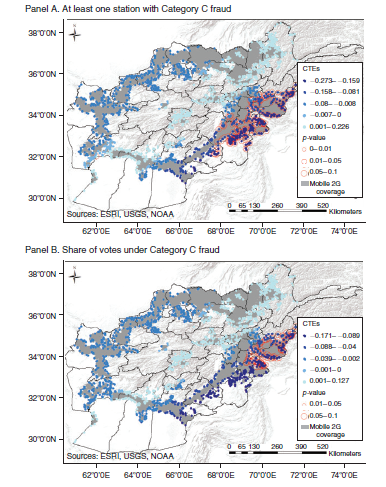

In [40]:
display_png(file="material/Appendix1.png") 

**Figure 1 in Appendix 4** presents the estimated boundary treatment effects on a map of Afghanistan. Panels A and B present results for each of the fraud outcomes. The analysis in panel A uses bandwidths of 6.10 and 7.68 km for the southeastern and northwestern areas, respectively, while panel B uses 5.96 and 7.03 km bandwidths for the southeastern and northwestern areas, respectively. Shaded areas represent cell phone coverage. Dots indicate the location of the boundary points $b_i$. The color of the dots, presented in a monochromatic scale, give the magnitude of the estimated effects. Refer to the legend for specific cutoffs. Statistically significant effects are highlighted with hollow circles representing the 1, 5, and 10 percent significance thresholds of the estimated p-values.

Similar to the results from the one-dimensional design, there is clear evidence that the share of fraudulent votes drops significantly at the coverage boundary. The magnitudes of the effects, however, are highly heterogenous both across and within regions of Afghanistan. Note that most of the economically significant effects are in the eastern part of the country. For instance, the magnitude of the drop in the share of fraudulent votes (panel B) in this area ranges between 9 to 17 percentage points. Similarly, most of the statistically significant effects appear in this area. Boundary treatment effects for other portions of the boundary within this region, although lower in magnitude, exhibit a negative sign. In all, about 71 percent (457 out of 642) of the boundary points evaluated in this area indicate a drop in the likelihood of fraudulent stations for centers within the coverage area relative to centers outside. Although some boundary points indicate a positive sign in the effect (and hence an increase in fraud due to coverage), none are statistically significant, and they show an average magnitude that is almost half the average of the boundary treatment effects with negative signs. Specifically, the average of the negative boundary treatment effects for the share of votes under Category C is about 7.3 percentage points, whereas the average magnitude for positive boundary treatment effects is about 4.1 percentage points. As previously shown, the estimated boundary effects for the northwestern region, however, are close to zero.

# Bibliography

1. Afghan Telecommunication Regulatory Authority (ATRA). 2012. “Coverage Footprint (2012).” http://atra.gov.af/en/page/7000/7006/coverage-footpring-2012.

2. AIMS. 1997–2005. “Roads of Afghanistan. Islamabad, Pakistan.” Afghanistan Information Management Services (AIMS).

3. Black, Dan, Jose Galdo, and Jeffrey Smith. 2007. “Evaluating the Regression Discontinuity Design Using Experimental Data.” http://economics.uwo.ca/newsletter/misc/2009/smith_mar25.pdf.

4. Cattaneo, Matias D., Michael Jansson, and Xinwei Ma. 2019. “Simple Local Polynomial Density Estimators.” Journal of the American Statistical Association 115 (531): 1449–55.

5. Electoral Complaints Commission. 2010. Final Report. 2009 Presidential and Provincial Council Elections. Kabul. https://www.dropbox.com/s/zq4eo4tlsp6uy0y/ECC%20Final%20Report%202009.pdf?dl=0.

6. Gonzalez, Robert. 2019. “Database of News Articles Referencing Cell Phone Tower Shutdowns in Afghanistan, 2008–2019.” Cell Phone Tower Shutdowns in Afghanistan.

7. Gonzalez, Robert M. 2021. “Replication data for: Cell Phone Access and Election Fraud: Evidence from a Spatial Regression Discontinuity Design in Afghanistan.” American Economic Association [publisher], Inter-university Consortium for Political and Social Research [distributor]. https://doi.org/10.38886/E118467V1.

8. Imbens, Guido, and Karthik Kalyanaraman. 2012. “Optimal Bandwidth Choice for the Regression Discontinuity Estimator.” Review of Economic Studies 79 (3): 933–59.

9. Imbens, Guido, and Tristan Zajonc. 2011. “Regression Discontinuity Design with Multiple Forcing Variables.” Unpublished.